<a href="https://colab.research.google.com/github/visheshagrawal/Affective-Computing-IIITD/blob/main/AFC_A3_2018420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# PIP INSTALL

In [ ]:
!pip install Moviepy
!pip install tqdm

# Importing Libraries

In [ ]:
from tqdm import tqdm
from sklearn import tree
from sklearn.svm import SVC
from moviepy.editor import *
from subprocess import PIPE, run
from sklearn import preprocessing
from sklearn.cluster import KMeans
from torch.autograd import Variable
from matplotlib import pyplot as plt
from contextlib import contextmanager
from sklearn.decomposition import PCA
from torch.utils.data import Dataset, DataLoader
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import librosa
import numpy as np 
import os
import moviepy 
import sys
import pickle
import torch.nn as nn
import torch.nn.functional as F 
import torch
import math
import matplotlib.pyplot as plt
import cv2

# BASELINE

## AUDIO

### Feature Extraction from Audio

In [ ]:
!git clone https://github.com/audeering/opensmile.git

Cloning into 'opensmile'...
remote: Enumerating objects: 1776, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 1776 (delta 9), reused 7 (delta 7), pack-reused 1753
Receiving objects: 100% (1776/1776), 10.76 MiB | 25.38 MiB/s, done.
Resolving deltas: 100% (678/678), done.


In [ ]:
%cd opensmile/

/content/opensmile


In [ ]:
!bash build.sh

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found Git: /usr/bin/git (found version "2.17.1") 
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD - Failed
-- Check if compiler accepts -pthread
-- Check if compiler accepts -pthread - yes
-- Found Threads: TRUE  
-- Configuring done
-- Generating done
-- Build files have been written to: /content/opensmile/build
[  0%] Building CXX object src/newmat/CMakeFiles/newmat.dir/hholder.cpp.o
[  1%] Bu

In [ ]:
!build/progsrc/smilextract/SMILExtract -h

 
   openSMILE version 3.0.1 (Rev. 1e17214)
   Build date: 2022-04-30T21:27:22Z
   Build branch: 'master'
   (c) 2022 by audEERING GmbH
   All rights reserved. See the file COPYING for license terms.
 
Usage: build/progsrc/smilextract/SMILExtract [-option (value)] ...
 
 -h  Show this usage information
 
 -C, -configfile <string>
     Path to openSMILE config file
     (default: 'smile.conf')
 
 -l, -loglevel <integer>
     Verbosity level (0-9)
     (default: 2)
 
 -t, -nticks <integer>
     Number of ticks to process (-1 = infinite) (only works for single-thread processing, i.e. nThreads=1)
     (default: -1)
 
 -L, -components [boolean 0/1]
     Show component list
     (default: 0)
 
 -H, -configHelp [string]
     Show documentation of registered config types (if an argument is given, show only documentation for config types beginning with the name given in the argument)
     (default: '')
 
 -configDflt [string]
     Show default config section templates for each config type (if a

In [ ]:
def checkAudioVideo(fileName):
  return fileName[:2]=='01' and fileName.find('.mp4')!=-1

In [ ]:
def out(command):
    result = run(command, stdout= PIPE, stderr= PIPE, universal_newlines= True, shell= True)
    return result.stdout

In [ ]:
# Test out() function
out('pwd')

'/content/opensmile\n'

In [ ]:
# Go into each file, check if it's video&audio, and then use openSMILE to get the .htk features, https://audeering.github.io/opensmile/get-started.html#mfcc-features
for eachActor in os.listdir('../drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/'):
  for eachVideo in os.listdir(f'../drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/{eachActor}/'):
    if checkAudioVideo(eachVideo):
      #  print(eachVideo)
      filename= f"/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/{eachActor}/{eachVideo}"
      audioclip= AudioFileClip(filename)
      audioclip= audioclip.subclip(0, min(audioclip.duration, 3.18))
      audioclip.write_audiofile(filename.replace('.mp4', '.wav'))
      # Compute audio features
      out(f"build/progsrc/smilextract/SMILExtract -C config/mfcc/MFCC12_E_D_A.conf -I {filename.replace('.mp4', '.wav')} -O {filename.replace('.mp4', '.mfcc.htk')}")

[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-01-01-01-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 249.40it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-01-01-02-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1050.79it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-01-01-01-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1033.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-02-01-01-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1155.88it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-01-01-02-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1044.37it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-02-01-01-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1040.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-02-01-02-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 302.70it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-02-01-02-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1174.34it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-02-02-01-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 926.10it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-02-02-02-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 521.48it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-02-02-01-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 825.10it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-02-02-02-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 957.83it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-03-01-01-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1050.18it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-03-01-02-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1044.53it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-03-01-01-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1032.62it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-03-01-02-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 885.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-03-02-02-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 930.98it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-03-02-01-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 908.92it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-03-02-01-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1236.92it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-04-01-01-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1724.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-04-01-02-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1491.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-04-01-01-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1608.57it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-03-02-02-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1712.18it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-04-01-02-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1704.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-04-02-01-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1549.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-04-02-01-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1592.21it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-04-02-02-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1357.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-04-02-02-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1611.88it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-05-01-01-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1634.64it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-05-01-01-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1625.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-05-01-02-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1593.56it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-05-01-02-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1232.49it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-05-02-01-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1878.34it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-05-02-01-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1314.06it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-05-02-02-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1325.43it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-06-01-02-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1458.49it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-06-01-01-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 855.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-05-02-02-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1161.17it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-06-01-01-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1567.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-06-02-01-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1548.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-06-02-01-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1678.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-06-01-02-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1653.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-07-01-01-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1524.30it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-06-02-02-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1619.79it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-06-02-02-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1452.79it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-07-01-01-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1618.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-07-01-02-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1146.40it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-07-01-02-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1067.43it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-07-02-01-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1572.15it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-07-02-01-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 802.06it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-07-02-02-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1514.27it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-07-02-02-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1703.80it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-08-01-02-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1750.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-08-01-01-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1908.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-08-01-02-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1223.12it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-08-01-01-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 2165.64it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-08-02-01-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1494.22it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-08-02-02-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1600.05it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-08-02-01-02-24.wav


100%|██████████| 71/71 [00:00<00:00, 1534.78it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_24/01-01-08-02-02-01-24.wav


100%|██████████| 71/71 [00:00<00:00, 1280.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-01-01-02-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 292.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-01-01-01-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1509.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-01-01-02-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1755.36it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-01-01-01-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1614.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-02-01-01-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1120.71it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-02-01-02-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1717.84it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-02-01-02-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1314.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-02-01-01-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1621.79it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-02-02-01-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1880.08it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-02-02-02-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1555.16it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-02-02-01-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1599.26it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-03-01-01-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1922.95it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-03-01-02-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1876.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-02-02-02-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1832.55it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-03-01-01-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1623.70it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-03-02-01-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1781.31it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-03-02-02-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1369.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-03-02-01-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1549.35it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-03-01-02-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1328.62it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-03-02-02-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1742.78it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-04-01-01-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1513.24it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-04-01-01-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1789.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-04-01-02-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1381.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-04-02-01-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1659.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-04-01-02-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1793.55it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-04-02-01-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1195.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-04-02-02-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1828.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-05-01-01-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1457.08it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-04-02-02-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1607.52it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-05-01-02-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1592.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-05-02-01-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1189.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-05-01-01-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1632.06it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-05-01-02-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1451.64it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-05-02-02-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1689.07it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-05-02-01-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1098.48it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-05-02-02-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1460.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-06-01-01-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1743.61it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-06-01-02-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1279.92it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-06-01-01-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1754.57it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-06-01-02-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1621.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-06-02-02-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1782.37it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-06-02-01-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1498.65it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-06-02-01-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1419.49it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-06-02-02-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1454.09it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-07-01-01-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1652.29it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-07-01-02-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 936.68it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-07-01-02-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1561.35it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-07-01-01-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1578.34it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-07-02-02-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1546.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-07-02-01-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1526.32it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-07-02-01-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1632.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-08-01-01-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1539.05it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-08-01-02-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 821.12it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-07-02-02-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1228.29it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-08-01-01-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1564.72it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-08-02-02-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1579.45it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-08-01-02-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1447.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-08-02-01-01-10.wav


100%|██████████| 71/71 [00:00<00:00, 1283.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-08-02-01-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1621.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_10/01-01-08-02-02-02-10.wav


100%|██████████| 71/71 [00:00<00:00, 1142.45it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-01-01-01-02-11.wav


100%|██████████| 70/70 [00:00<00:00, 155.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-01-01-01-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1105.37it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-01-01-02-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1456.51it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-01-01-02-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1419.23it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-02-01-01-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1843.78it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-02-01-01-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1282.37it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-02-02-01-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1027.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-02-01-02-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1618.95it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-02-02-01-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1494.67it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-02-01-02-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1539.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-03-01-01-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1727.98it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-03-01-01-01-11.wav


100%|██████████| 70/70 [00:00<00:00, 1315.32it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-02-02-02-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1528.10it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-02-02-02-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1301.23it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-03-02-01-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1446.55it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-03-01-02-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1244.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-03-01-02-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1576.35it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-03-02-02-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1443.36it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-03-02-02-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1699.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-04-01-01-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1344.13it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-03-02-01-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1265.04it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-04-01-02-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 756.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-04-01-01-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1658.59it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-04-01-02-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1375.98it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-04-02-02-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1597.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-04-02-02-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1358.01it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-04-02-01-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1569.70it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-04-02-01-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1078.74it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-05-01-01-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1308.45it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-05-01-01-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1470.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-05-01-02-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1451.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-05-01-02-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1478.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-05-02-01-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1514.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-05-02-02-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1489.98it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-05-02-01-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1089.18it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-06-01-01-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1531.36it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-05-02-02-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1722.42it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-06-01-01-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1702.71it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-06-01-02-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1469.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-06-02-01-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1729.12it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-06-02-02-01-11.wav


100%|██████████| 69/69 [00:00<00:00, 1419.47it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-06-01-02-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1242.59it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-06-02-02-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1292.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-06-02-01-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1661.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-07-01-02-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1563.15it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-07-01-01-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1290.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-07-01-02-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1657.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-07-01-01-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1722.84it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-07-02-02-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 908.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-07-02-01-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1752.81it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-07-02-01-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1154.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-08-01-02-01-11.wav


100%|██████████| 71/71 [00:00<00:00, 1159.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-07-02-02-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 1282.83it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-08-01-01-01-11.wav


100%|██████████| 69/69 [00:00<00:00, 1239.56it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-08-01-02-02-11.wav


100%|██████████| 67/67 [00:00<00:00, 1347.53it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-08-01-01-02-11.wav


100%|██████████| 71/71 [00:00<00:00, 846.71it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-08-02-01-02-11.wav


100%|██████████| 70/70 [00:00<00:00, 1301.98it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-08-02-02-02-11.wav


100%|██████████| 69/69 [00:00<00:00, 1378.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-08-02-01-01-11.wav


100%|██████████| 69/69 [00:00<00:00, 1512.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_11/01-01-08-02-02-01-11.wav


100%|██████████| 69/69 [00:00<00:00, 1631.22it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-01-01-01-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 229.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-01-01-01-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1236.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-01-01-02-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1721.47it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-01-01-02-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1856.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-02-01-01-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 548.72it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-02-01-01-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 587.70it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-02-01-02-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1588.95it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-02-01-02-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1495.43it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-02-02-02-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1476.45it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-02-02-02-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1650.90it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-02-02-01-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1575.16it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-02-02-01-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1421.80it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-03-01-01-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1553.32it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-03-01-02-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1404.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-03-01-01-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1480.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-03-02-01-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1455.17it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-03-02-02-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1735.17it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-03-02-01-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1581.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-03-01-02-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1436.41it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-03-02-02-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1349.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-04-01-01-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1478.87it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-04-01-01-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1620.27it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-04-01-02-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1444.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-04-01-02-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1276.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-04-02-01-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1360.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-04-02-01-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1448.06it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-05-01-01-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1232.61it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-04-02-02-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1228.56it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-04-02-02-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1863.10it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-05-01-02-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1394.47it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-05-01-01-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1406.71it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-05-01-02-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1160.97it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-05-02-01-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 753.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-05-02-02-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1627.27it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-05-02-01-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1348.65it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-05-02-02-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1527.85it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-06-01-01-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1509.08it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-06-01-02-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1600.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-06-01-02-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1439.13it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-06-01-01-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1111.26it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-06-02-01-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1555.13it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-06-02-01-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1570.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-06-02-02-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1372.49it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-07-01-01-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1465.42it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-07-01-01-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1511.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-06-02-02-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1638.33it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-07-01-02-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1542.78it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-07-01-02-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1649.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-07-02-01-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1313.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-07-02-01-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1660.79it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-08-01-01-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1189.40it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-07-02-02-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1469.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-07-02-02-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1307.53it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-08-01-01-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1359.29it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-08-01-02-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1490.33it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-08-01-02-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1406.65it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-08-02-01-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1466.61it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-08-02-02-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1135.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-08-02-02-01-12.wav


100%|██████████| 71/71 [00:00<00:00, 1342.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_12/01-01-08-02-01-02-12.wav


100%|██████████| 71/71 [00:00<00:00, 1141.90it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-01-01-01-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 251.29it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-01-01-01-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 497.97it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-02-01-01-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1529.64it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-01-01-02-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1368.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-01-01-02-01-13.wav


100%|██████████| 69/69 [00:00<00:00, 1357.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-02-01-01-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1158.80it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-02-01-02-02-13.wav


100%|██████████| 66/66 [00:00<00:00, 1293.95it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-02-01-02-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 786.41it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-02-02-01-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1560.43it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-02-02-02-01-13.wav


100%|██████████| 68/68 [00:00<00:00, 1452.85it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-02-02-01-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1452.34it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-03-01-02-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1435.22it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-02-02-02-02-13.wav


100%|██████████| 68/68 [00:00<00:00, 1412.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-03-01-01-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1397.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-03-01-01-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1531.87it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-03-01-02-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1595.98it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-03-02-01-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1240.12it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-03-02-01-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 947.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-03-02-02-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1513.94it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-04-01-01-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 945.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-04-01-01-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1571.47it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-03-02-02-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1483.66it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-04-01-02-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 894.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-04-01-02-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1634.10it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-04-02-01-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1178.35it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-04-02-01-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1628.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-05-01-01-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1536.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-04-02-02-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1489.07it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-04-02-02-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1501.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-05-01-01-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1621.97it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-05-02-01-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1413.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-05-02-01-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1584.72it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-05-01-02-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1060.70it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-05-01-02-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1806.47it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-06-01-01-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1432.43it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-05-02-02-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1404.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-05-02-02-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1471.66it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-06-01-02-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1265.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-06-01-01-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1608.98it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-06-01-02-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1746.05it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-06-02-01-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1231.90it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-07-01-01-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1281.52it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-06-02-02-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1345.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-06-02-02-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1806.16it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-06-02-01-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1184.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-07-01-01-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1093.35it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-07-01-02-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1499.84it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-07-02-01-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1585.65it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-07-01-02-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1459.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-07-02-01-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 737.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-07-02-02-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1390.78it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-08-01-01-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1659.87it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-07-02-02-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1319.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-08-01-01-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1044.83it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-08-01-02-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1698.70it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-08-01-02-02-13.wav


100%|██████████| 68/68 [00:00<00:00, 1170.30it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-08-02-01-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 780.31it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-08-02-01-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1362.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-08-02-02-02-13.wav


100%|██████████| 71/71 [00:00<00:00, 1498.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_13/01-01-08-02-02-01-13.wav


100%|██████████| 71/71 [00:00<00:00, 1036.44it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-01-01-01-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 247.68it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-01-01-01-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1517.31it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-01-01-02-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1476.17it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-02-01-02-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1263.48it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-01-01-02-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 965.62it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-02-01-01-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1403.41it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-02-01-01-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1265.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-02-02-01-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1425.88it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-02-02-01-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1231.88it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-02-01-02-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1477.97it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-03-01-01-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1251.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-03-01-01-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1429.37it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-02-02-02-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1723.35it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-02-02-02-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1400.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-03-01-02-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1543.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-03-01-02-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1355.07it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-03-02-01-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1142.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-03-02-02-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1098.76it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-04-01-01-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1349.32it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-03-02-01-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1587.97it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-03-02-02-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1584.78it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-04-01-02-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1089.78it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-04-01-01-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1476.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-04-01-02-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1576.40it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-04-02-01-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1305.04it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-04-02-02-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1455.07it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-04-02-01-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1065.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-05-01-01-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1226.32it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-04-02-02-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1670.56it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-05-01-01-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1353.71it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-05-01-02-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1274.74it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-05-01-02-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1457.63it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-05-02-01-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1158.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-05-02-02-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1524.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-05-02-01-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1609.53it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-05-02-02-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1303.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-06-01-01-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1356.84it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-06-01-02-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1140.95it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-06-01-02-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1291.04it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-06-01-01-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1206.08it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-06-02-01-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1374.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-06-02-02-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1269.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-06-02-02-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1252.97it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-06-02-01-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1491.17it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-07-01-02-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1376.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-07-01-01-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1765.21it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-07-01-01-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 989.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-07-01-02-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1614.10it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-07-02-01-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1422.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-07-02-01-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1455.33it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-07-02-02-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1084.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-08-01-02-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1466.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-08-01-01-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1442.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-07-02-02-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1468.51it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-08-01-01-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1315.07it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-08-02-01-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1304.59it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-08-02-01-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1196.68it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-08-01-02-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1530.94it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-08-02-02-02-14.wav


100%|██████████| 71/71 [00:00<00:00, 1212.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_14/01-01-08-02-02-01-14.wav


100%|██████████| 71/71 [00:00<00:00, 1463.87it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-01-01-01-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 300.44it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-01-01-01-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1412.19it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-01-01-02-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1196.90it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-02-01-01-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1374.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-01-01-02-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1442.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-02-01-01-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1561.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-02-02-01-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 981.47it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-02-01-02-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1462.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-02-02-01-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1064.34it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-02-01-02-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1798.40it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-02-02-02-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1297.06it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-03-01-01-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1309.23it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-02-02-02-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1437.24it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-03-02-01-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1544.05it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-03-01-01-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1415.31it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-03-01-02-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 164.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-03-01-02-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1433.87it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-03-02-02-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1218.13it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-03-02-01-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1297.01it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-03-02-02-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1522.41it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-04-01-01-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1395.93it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-04-01-01-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1434.68it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-04-01-02-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1341.68it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-04-02-01-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1420.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-04-01-02-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1516.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-04-02-02-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1441.95it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-05-01-01-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1083.62it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-04-02-01-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1031.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-04-02-02-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1333.45it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-05-01-02-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1108.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-05-01-01-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1090.70it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-05-02-01-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1565.15it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-05-01-02-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1348.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-05-02-01-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1132.93it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-05-02-02-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1539.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-06-01-01-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 942.43it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-05-02-02-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1191.51it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-06-01-01-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1669.55it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-06-01-02-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1526.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-06-01-02-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1140.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-06-02-01-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1509.27it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-06-02-02-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1402.98it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-06-02-01-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 873.48it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-07-01-01-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1564.61it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-06-02-02-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1410.52it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-07-01-02-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1498.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-07-01-02-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1345.55it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-07-01-01-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1457.45it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-07-02-01-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1011.51it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-07-02-02-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 915.47it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-07-02-01-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1240.67it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-07-02-02-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1293.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-08-01-02-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1267.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-08-01-02-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1225.87it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-08-01-01-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1540.05it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-08-01-01-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1386.88it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-08-02-01-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1326.45it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-08-02-01-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1437.47it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-08-02-02-02-15.wav


100%|██████████| 71/71 [00:00<00:00, 1361.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_15/01-01-08-02-02-01-15.wav


100%|██████████| 71/71 [00:00<00:00, 1319.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-01-01-01-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 260.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-01-01-01-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1495.64it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-02-01-01-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 886.36it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-01-01-02-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 921.27it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-01-01-02-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1240.27it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-02-01-02-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1570.68it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-02-01-02-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1052.66it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-02-01-01-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1540.62it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-02-02-01-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1357.05it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-02-02-02-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1628.04it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-03-01-01-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1280.89it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-02-02-01-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1652.79it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-02-02-02-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1580.93it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-03-01-02-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 418.65it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-03-01-02-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1325.51it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-03-01-01-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 763.04it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-03-02-02-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1576.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-03-02-01-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 882.53it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-03-02-02-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1448.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-03-02-01-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1408.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-04-01-02-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1448.21it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-04-01-01-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1210.53it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-04-01-02-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1625.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-04-01-01-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1002.40it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-04-02-01-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 969.36it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-04-02-01-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1395.21it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-04-02-02-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1435.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-05-01-01-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1041.43it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-05-01-01-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1384.45it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-04-02-02-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1565.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-05-02-01-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1076.90it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-05-02-01-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 998.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-05-01-02-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1324.79it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-05-01-02-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1624.65it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-05-02-02-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 908.56it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-05-02-02-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1422.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-06-01-01-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1067.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-06-01-01-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1076.22it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-06-01-02-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1145.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-06-02-01-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1237.18it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-06-01-02-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 941.35it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-06-02-02-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1453.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-06-02-02-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1182.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-07-01-01-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1046.27it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-06-02-01-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 837.31it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-07-02-01-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1480.13it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-07-01-01-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1215.16it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-07-01-02-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1163.68it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-07-01-02-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1106.37it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-07-02-01-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1324.42it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-07-02-02-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1046.59it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-07-02-02-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1216.26it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-08-01-01-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1066.80it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-08-01-01-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1229.17it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-08-01-02-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1352.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-08-01-02-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1691.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-08-02-02-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1159.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-08-02-02-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 927.09it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-08-02-01-02-16.wav


100%|██████████| 71/71 [00:00<00:00, 1249.45it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_16/01-01-08-02-01-01-16.wav


100%|██████████| 71/71 [00:00<00:00, 1455.61it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-01-01-01-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 238.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-01-01-01-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1018.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-02-01-01-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1149.56it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-01-01-02-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1498.06it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-02-01-01-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 581.68it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-01-01-02-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1469.59it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-02-01-02-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1465.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-02-01-02-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1002.15it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-02-02-01-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1315.17it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-02-02-01-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1527.19it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-03-01-01-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1156.61it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-03-01-01-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1263.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-02-02-02-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1390.94it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-02-02-02-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1463.51it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-03-01-02-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1445.76it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-03-02-01-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1440.65it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-03-01-02-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1450.88it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-03-02-02-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1485.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-03-02-01-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1167.05it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-03-02-02-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1498.83it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-04-01-01-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1055.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-04-01-02-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1356.48it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-04-01-02-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1310.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-04-01-01-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1083.18it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-04-02-01-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1513.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-04-02-02-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1275.52it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-04-02-01-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1491.24it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-04-02-02-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 945.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-05-01-01-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1449.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-05-01-01-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1331.88it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-05-01-02-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1525.92it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-05-01-02-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1537.49it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-05-02-01-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1302.13it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-05-02-01-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1363.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-05-02-02-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1543.34it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-06-01-01-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1257.72it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-06-01-01-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1171.44it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-06-01-02-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1592.94it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-05-02-02-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1121.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-06-02-01-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 589.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-06-02-02-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1234.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-06-01-02-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1491.41it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-06-02-01-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1125.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-06-02-02-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1366.78it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-07-01-02-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1423.29it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-07-01-01-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1521.09it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-07-01-01-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1352.37it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-07-02-01-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1201.21it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-07-01-02-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1168.15it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-07-02-01-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1525.47it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-07-02-02-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1324.47it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-07-02-02-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 997.59it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-08-01-01-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 595.09it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-08-01-01-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1526.56it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-08-02-01-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1268.61it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-08-01-02-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1318.07it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-08-02-01-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1329.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-08-01-02-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1577.72it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-08-02-02-01-17.wav


100%|██████████| 71/71 [00:00<00:00, 1566.41it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_17/01-01-08-02-02-02-17.wav


100%|██████████| 71/71 [00:00<00:00, 1519.36it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-01-01-01-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 177.95it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-01-01-01-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1132.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-01-01-02-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1199.66it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-01-01-02-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1221.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-02-01-02-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1033.21it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-02-01-02-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1347.43it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-02-01-01-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1353.27it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-02-01-01-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1252.09it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-02-02-01-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1468.83it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-02-02-01-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1166.63it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-02-02-02-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1168.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-02-02-02-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1242.07it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-03-01-02-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1397.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-03-01-01-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1386.17it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-03-01-01-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1049.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-03-01-02-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1043.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-03-02-02-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1014.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-03-02-01-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1101.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-03-02-01-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1509.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-04-01-02-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1087.44it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-04-01-01-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1191.66it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-03-02-02-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1451.81it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-04-01-01-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1180.30it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-04-02-01-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1363.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-04-01-02-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 976.51it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-04-02-01-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1495.92it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-04-02-02-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1389.64it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-05-01-01-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1168.26it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-04-02-02-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1196.05it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-05-01-02-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1257.74it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-05-02-01-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1248.23it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-05-01-02-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1097.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-05-01-01-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1129.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-05-02-02-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1419.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-05-02-01-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1266.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-05-02-02-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 998.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-06-01-02-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1248.76it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-06-01-01-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1344.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-06-01-01-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1322.64it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-06-01-02-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 916.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-06-02-01-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 761.13it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-06-02-01-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1182.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-06-02-02-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1135.45it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-07-01-01-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 626.07it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-07-01-01-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1504.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-06-02-02-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1567.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-07-02-01-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 690.41it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-07-01-02-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1298.63it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-07-01-02-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1209.37it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-07-02-01-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1263.55it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-07-02-02-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1553.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-08-01-01-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1562.05it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-08-01-02-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1040.62it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-07-02-02-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1378.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-08-01-01-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1404.05it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-08-02-02-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1065.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-08-02-01-01-18.wav


100%|██████████| 71/71 [00:00<00:00, 1297.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-08-02-01-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1260.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-08-01-02-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1018.76it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_18/01-01-08-02-02-02-18.wav


100%|██████████| 71/71 [00:00<00:00, 1040.65it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-01-01-01-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 222.05it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-01-01-01-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 142.29it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-01-01-02-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1267.87it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-01-01-02-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1340.04it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-02-01-01-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1394.84it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-02-01-02-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1375.32it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-02-01-02-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1415.34it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-02-01-01-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1291.04it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-02-02-01-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1424.23it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-02-02-02-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1204.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-02-02-02-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1223.61it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-02-02-01-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1324.76it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-03-01-01-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1530.85it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-03-01-02-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1070.18it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-03-01-01-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1203.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-03-01-02-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1355.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-03-02-02-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1307.76it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-03-02-01-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 976.59it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-03-02-01-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1211.62it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-04-01-01-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 795.90it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-04-01-01-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1375.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-04-01-02-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 944.67it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-03-02-02-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1246.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-04-02-01-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1486.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-04-02-01-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1194.21it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-04-01-02-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1229.83it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-04-02-02-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1041.90it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-05-01-01-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1304.13it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-05-01-01-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1216.36it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-04-02-02-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1259.67it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-05-02-01-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1192.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-05-01-02-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 995.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-05-01-02-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1115.70it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-05-02-01-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1439.06it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-05-02-02-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1402.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-06-01-01-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 755.48it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-05-02-02-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1198.12it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-06-01-01-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1174.30it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-06-01-02-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1358.57it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-06-01-02-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1326.35it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-06-02-01-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1357.71it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-06-02-01-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1054.62it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-06-02-02-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1301.49it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-06-02-02-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1284.94it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-07-01-01-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1248.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-07-01-02-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1245.45it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-07-01-01-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1187.74it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-07-02-01-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1214.35it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-07-02-01-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1321.32it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-07-01-02-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 871.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-07-02-02-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1171.29it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-08-01-01-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1295.17it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-07-02-02-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1051.52it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-08-01-02-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1156.76it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-08-02-01-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1241.89it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-08-01-02-02-19.wav


100%|██████████| 69/69 [00:00<00:00, 1067.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-08-01-01-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1076.76it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-08-02-01-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1392.08it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-08-02-02-02-19.wav


100%|██████████| 71/71 [00:00<00:00, 1430.21it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_19/01-01-08-02-02-01-19.wav


100%|██████████| 71/71 [00:00<00:00, 1170.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-01-01-01-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 260.93it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-01-01-02-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1269.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-01-01-01-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1363.76it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-02-01-02-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1434.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-02-01-01-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1457.52it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-02-01-01-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1366.83it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-01-01-02-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 925.40it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-02-02-01-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1177.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-02-01-02-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1308.61it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-02-02-01-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1186.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-03-01-01-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1254.63it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-02-02-02-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1240.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-03-01-01-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1178.37it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-02-02-02-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1425.81it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-03-01-02-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1424.57it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-03-02-01-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1129.42it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-03-01-02-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1163.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-03-02-01-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1206.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-03-02-02-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 999.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-04-01-01-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1273.44it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-03-02-02-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1129.56it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-04-01-02-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1507.41it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-04-01-01-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1228.41it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-04-02-01-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 873.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-04-01-02-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1274.06it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-04-02-01-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1300.64it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-04-02-02-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 915.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-04-02-02-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1218.16it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-05-01-01-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1362.62it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-05-01-02-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1170.81it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-05-01-02-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1145.26it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-05-01-01-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 958.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-05-02-01-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1346.68it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-05-02-01-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1209.76it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-05-02-02-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1103.47it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-06-01-02-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1152.85it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-06-01-01-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1342.22it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-05-02-02-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1196.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-06-01-01-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1154.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-06-02-01-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1487.17it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-06-02-01-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1346.59it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-06-01-02-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1304.59it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-07-01-01-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1400.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-06-02-02-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1126.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-07-01-01-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1299.55it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-06-02-02-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1026.85it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-07-01-02-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1319.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-07-01-02-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1371.21it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-07-02-01-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1393.08it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-07-02-02-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 898.13it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-07-02-01-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1140.27it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-07-02-02-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1047.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-08-01-01-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1017.24it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-08-01-02-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1014.31it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-08-01-02-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1388.05it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-08-01-01-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1457.30it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-08-02-02-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1394.15it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-08-02-01-01-20.wav


100%|██████████| 71/71 [00:00<00:00, 1527.27it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-08-02-02-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1155.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_20/01-01-08-02-01-02-20.wav


100%|██████████| 71/71 [00:00<00:00, 1039.55it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-01-01-01-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 268.36it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-01-01-01-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1454.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-02-01-01-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1239.78it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-01-01-02-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 934.42it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-02-01-01-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1107.74it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-01-01-02-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1425.04it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-02-01-02-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1283.88it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-02-01-02-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1378.88it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-02-02-01-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1391.87it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-02-02-02-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1128.15it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-02-02-01-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 985.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-03-01-01-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1226.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-02-02-02-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1431.52it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-03-01-01-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1397.81it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-03-01-02-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1326.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-03-01-02-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1473.66it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-03-02-01-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1248.09it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-03-02-01-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1183.27it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-03-02-02-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1255.33it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-04-01-01-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1485.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-04-01-01-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1103.78it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-04-01-02-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1588.33it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-03-02-02-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1237.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-04-02-01-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1098.01it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-04-01-02-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 765.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-04-02-02-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1273.18it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-04-02-02-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1108.30it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-04-02-01-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1197.94it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-05-01-02-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1413.13it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-05-01-02-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1099.01it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-05-01-01-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1226.74it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-05-01-01-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1161.64it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-05-02-01-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1267.04it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-05-02-01-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1294.01it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-05-02-02-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1089.84it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-05-02-02-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1109.17it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-06-01-01-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1340.36it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-06-01-01-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1394.27it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-06-01-02-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1242.44it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-06-02-01-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1299.45it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-06-02-01-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1314.89it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-06-01-02-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1311.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-06-02-02-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1223.51it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-06-02-02-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 846.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-07-01-01-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1230.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-07-02-01-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1496.84it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-07-01-01-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1217.70it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-07-01-02-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1388.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-07-01-02-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1479.88it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-07-02-02-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1403.31it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-07-02-02-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 835.26it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-07-02-01-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1028.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-08-01-02-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 982.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-08-01-01-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1095.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-08-01-02-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1079.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-08-01-01-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1288.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-08-02-01-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1339.35it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-08-02-02-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 1288.84it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-08-02-01-02-21.wav


100%|██████████| 71/71 [00:00<00:00, 971.29it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_21/01-01-08-02-02-01-21.wav


100%|██████████| 71/71 [00:00<00:00, 1334.05it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-01-01-01-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 270.33it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-01-01-02-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1268.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-01-01-01-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 892.31it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-02-01-01-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1287.55it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-01-01-02-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1084.67it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-02-01-02-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 563.93it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-02-01-01-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1006.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-02-01-02-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1308.81it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-02-02-02-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1294.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-02-02-01-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1334.16it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-02-02-01-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1062.79it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-02-02-02-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1235.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-03-01-01-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 736.21it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-03-01-01-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1302.15it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-03-01-02-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1297.71it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-03-01-02-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1297.94it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-03-02-01-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1605.85it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-03-02-01-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1306.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-03-02-02-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1352.45it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-04-01-01-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1191.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-03-02-02-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1201.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-04-01-01-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1027.41it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-04-02-01-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1206.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-04-01-02-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1115.21it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-04-01-02-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1306.62it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-04-02-01-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1257.24it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-04-02-02-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1102.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-05-01-01-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1232.59it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-04-02-02-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1279.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-05-01-02-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1140.74it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-05-01-02-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1179.09it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-05-01-01-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1057.90it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-05-02-01-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1208.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-05-02-02-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 917.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-05-02-01-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1290.23it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-05-02-02-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1279.93it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-06-01-02-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1236.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-06-01-01-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1122.33it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-06-01-02-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1202.85it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-06-01-01-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1087.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-06-02-01-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 953.51it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-06-02-01-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1215.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-06-02-02-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1204.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-06-02-02-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1417.45it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-07-01-02-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 687.40it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-07-01-02-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1196.83it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-07-01-01-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1390.57it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-07-01-01-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1490.04it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-07-02-02-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 958.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-07-02-01-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 995.56it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-07-02-01-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 636.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-08-01-01-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1183.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-08-01-01-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1252.63it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-08-01-02-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1301.08it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-07-02-02-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 935.33it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-08-02-01-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 1158.42it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-08-02-01-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1143.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-08-01-02-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1067.12it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-08-02-02-01-22.wav


100%|██████████| 71/71 [00:00<00:00, 916.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_22/01-01-08-02-02-02-22.wav


100%|██████████| 71/71 [00:00<00:00, 1135.83it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-01-01-01-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 196.59it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-01-01-01-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1259.04it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-01-01-02-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1221.44it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-02-01-01-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1270.56it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-02-01-01-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1153.32it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-01-01-02-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1325.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-02-02-01-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1089.34it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-02-01-02-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1267.56it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-02-01-02-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1252.48it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-02-02-01-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1339.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-02-02-02-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1131.18it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-02-02-02-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1278.10it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-03-01-01-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 954.12it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-03-01-02-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1061.27it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-03-01-01-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 986.76it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-03-01-02-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1162.30it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-03-02-02-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1289.81it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-03-02-02-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1348.43it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-03-02-01-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1165.53it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-03-02-01-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1327.55it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-04-01-01-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1216.72it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-04-01-01-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1334.72it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-04-01-02-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1245.62it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-04-02-01-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1234.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-04-02-01-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1344.93it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-04-01-02-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1125.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-04-02-02-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1098.33it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-05-01-01-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 947.40it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-04-02-02-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1202.01it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-05-01-02-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 934.71it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-05-01-01-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 856.85it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-05-02-01-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1178.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-05-01-02-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1262.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-05-02-01-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1266.01it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-06-01-02-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1222.98it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-06-01-01-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1224.29it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-06-01-01-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1105.90it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-05-02-02-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1038.15it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-05-02-02-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1289.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-06-01-02-02-23.wav


100%|██████████| 70/70 [00:00<00:00, 1039.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-06-02-01-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1240.34it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-06-02-01-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 902.92it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-07-01-01-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1323.92it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-06-02-02-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1284.68it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-07-01-01-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1262.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-06-02-02-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1225.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-07-01-02-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1033.04it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-07-01-02-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1040.83it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-07-02-01-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 954.87it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-07-02-02-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1148.17it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-07-02-01-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 686.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-07-02-02-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1102.51it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-08-01-01-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1161.87it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-08-01-01-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1239.08it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-08-01-02-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1308.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-08-01-02-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1095.49it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-08-02-01-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 835.97it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-08-02-01-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 1398.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-08-02-02-01-23.wav


100%|██████████| 71/71 [00:00<00:00, 1250.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_23/01-01-08-02-02-02-23.wav


100%|██████████| 71/71 [00:00<00:00, 949.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-01-01-01-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 272.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-02-01-02-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1342.29it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-01-01-02-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1281.09it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-01-01-02-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1161.06it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-02-01-01-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1161.13it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-02-01-02-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 848.87it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-02-01-01-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1474.36it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-01-01-01-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 955.63it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-02-02-01-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1314.07it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-03-01-01-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 974.57it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-02-02-02-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1241.92it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-02-02-01-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 972.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-02-02-02-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1353.12it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-03-02-01-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1404.15it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-03-01-01-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1112.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-03-01-02-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1354.41it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-03-02-01-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1364.59it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-03-02-02-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1244.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-03-01-02-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1353.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-04-01-02-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 980.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-04-02-01-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1247.30it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-04-01-01-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1260.66it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-04-01-02-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1131.78it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-04-01-01-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1390.89it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-03-02-02-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1209.81it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-05-01-01-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 888.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-05-01-02-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 823.24it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-05-01-01-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1092.64it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-04-02-02-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1255.62it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-04-02-02-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1083.66it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-04-02-01-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1044.88it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-05-02-01-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1046.10it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-05-01-02-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 854.97it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-05-02-02-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 922.10it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-05-02-01-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 752.89it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-05-02-02-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1265.01it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-06-01-02-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1233.57it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-06-01-01-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1158.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-06-02-01-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 728.16it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-06-02-01-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1330.07it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-06-01-01-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1312.05it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-06-01-02-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1292.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-07-01-01-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1241.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-07-01-02-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1218.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-07-01-01-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1098.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-06-02-02-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1108.88it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-06-02-02-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1323.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-07-02-02-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1015.87it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-07-02-01-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1258.78it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-07-02-01-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1139.30it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-07-01-02-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1221.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-07-02-02-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 555.53it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-08-01-01-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1085.78it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-08-01-02-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1277.37it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-08-01-02-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1248.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-08-02-01-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1188.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-08-01-01-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 936.59it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-08-02-01-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1320.93it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-08-02-02-01-01.wav


100%|██████████| 71/71 [00:00<00:00, 1037.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-08-02-02-02-01.wav


100%|██████████| 71/71 [00:00<00:00, 1327.85it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-01-01-02-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 251.72it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-01-01-01-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1426.48it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-01-01-02-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1016.68it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-01-01-01-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1182.56it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-02-02-01-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1166.68it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-02-01-01-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1016.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-02-01-01-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1128.43it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-02-01-02-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1006.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-02-01-02-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1237.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-02-02-01-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1088.45it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-03-01-01-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1162.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-02-02-02-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1255.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-03-01-02-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1234.68it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-03-01-01-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1166.97it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-02-02-02-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1278.22it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-04-01-01-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 988.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-03-01-02-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1216.13it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-03-02-01-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1056.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-03-02-02-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 920.64it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-03-02-02-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 964.61it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-03-02-01-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 815.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-04-01-02-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1185.85it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-04-01-01-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1258.24it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-04-01-02-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1305.74it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-04-02-01-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1079.23it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-04-02-01-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1385.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-04-02-02-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 962.26it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-05-01-01-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 896.71it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-05-01-02-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1049.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-05-01-02-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1012.70it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-04-02-02-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 921.33it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-05-01-01-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1204.36it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-05-02-02-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1054.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-05-02-01-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 911.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-05-02-01-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1169.31it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-06-01-01-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1006.64it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-06-01-01-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 899.19it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-05-02-02-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1321.42it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-06-02-01-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1085.95it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-06-01-02-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 680.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-06-02-02-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1206.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-06-01-02-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1176.47it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-06-02-02-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1100.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-06-02-01-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1051.95it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-07-01-02-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1343.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-07-02-01-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1177.21it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-07-02-01-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1029.89it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-07-01-02-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1099.65it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-07-01-01-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1040.16it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-07-01-01-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1110.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-07-02-02-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 961.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-08-01-01-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 782.04it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-08-01-02-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 711.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-07-02-02-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1002.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-08-01-01-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1198.83it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-08-02-02-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1032.33it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-08-02-01-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 1277.29it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-08-02-01-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1176.98it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-08-01-02-02-02.wav


100%|██████████| 71/71 [00:00<00:00, 1247.72it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_02/01-01-08-02-02-01-02.wav


100%|██████████| 71/71 [00:00<00:00, 976.17it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-01-01-02-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 239.36it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-01-01-01-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1165.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-01-01-02-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1135.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-01-01-01-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1186.21it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-02-01-01-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1120.83it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-02-01-02-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 996.12it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-02-01-01-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1374.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-02-01-02-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1208.62it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-02-02-01-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 966.37it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-02-02-01-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1187.32it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-02-02-02-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1186.56it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-02-02-02-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1168.71it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-03-01-01-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1142.08it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-03-01-02-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1325.08it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-03-01-01-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1157.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-03-02-01-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1190.63it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-03-01-02-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1102.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-03-02-01-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1277.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-03-02-02-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1075.32it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-04-01-01-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 941.85it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-04-01-02-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1250.89it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-03-02-02-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 745.68it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-04-01-01-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1226.05it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-04-02-01-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1057.76it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-04-02-01-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1225.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-04-01-02-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1154.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-04-02-02-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1050.26it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-05-01-01-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1286.09it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-04-02-02-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1127.27it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-05-01-01-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1127.74it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-05-01-02-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1192.32it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-05-02-01-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1168.37it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-05-01-02-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 955.45it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-05-02-02-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1222.63it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-05-02-01-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1270.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-05-02-02-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1133.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-06-01-02-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1023.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-06-01-01-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 864.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-06-01-01-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1019.43it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-06-01-02-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1290.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-06-02-02-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1318.30it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-06-02-01-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1085.72it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-06-02-02-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1385.41it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-06-02-01-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1309.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-07-01-02-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1284.59it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-07-01-01-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1022.72it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-07-01-01-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1105.65it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-07-01-02-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1257.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-07-02-01-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1065.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-07-02-02-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 921.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-07-02-01-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 911.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-08-01-01-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1140.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-07-02-02-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1180.76it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-08-01-01-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1245.51it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-08-01-02-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 947.01it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-08-02-01-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1070.79it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-08-02-02-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1148.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-08-02-01-01-03.wav


100%|██████████| 71/71 [00:00<00:00, 1076.84it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-08-01-02-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1312.61it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_03/01-01-08-02-02-02-03.wav


100%|██████████| 71/71 [00:00<00:00, 1047.31it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-01-01-01-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 187.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-01-01-01-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 1131.12it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-01-01-02-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 1122.08it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-01-01-02-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 1020.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-02-01-01-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 1067.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-02-01-01-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 1118.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-02-01-02-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 1105.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-02-02-01-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 968.31it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-02-01-02-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 845.68it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-02-02-01-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 1206.92it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-02-02-02-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 991.36it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-03-01-01-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 1160.12it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-02-02-02-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 1123.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-03-01-02-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 1119.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-03-02-01-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 966.01it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-03-01-01-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 1132.51it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-03-01-02-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 1077.49it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-03-02-02-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 1233.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-03-02-02-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 975.43it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-03-02-01-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 1165.33it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-04-01-01-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 1045.16it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-04-01-02-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 1318.06it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-04-01-02-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 651.05it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-04-01-01-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 993.67it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-04-02-01-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 1073.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-04-02-02-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 1314.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-04-02-01-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 859.55it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-05-01-01-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 754.88it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-04-02-02-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 1116.43it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-05-01-01-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 763.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-05-01-02-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 1329.06it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-05-02-01-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 1096.07it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-05-02-02-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 1267.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-05-02-01-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 1289.76it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-05-01-02-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 1007.47it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-05-02-02-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 1067.12it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-06-01-01-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 990.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-06-01-02-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 1237.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-06-01-01-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 1167.44it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-06-02-02-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 1282.30it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-06-01-02-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 884.17it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-06-02-01-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 1151.65it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-06-02-01-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 1038.65it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-06-02-02-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 896.90it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-07-01-02-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 1262.05it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-07-01-01-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 932.32it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-07-01-01-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 1222.30it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-07-02-01-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 647.92it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-07-02-01-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 1075.31it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-07-01-02-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 933.10it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-08-01-01-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 1250.49it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-07-02-02-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 945.48it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-08-01-01-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 852.95it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-07-02-02-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 898.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-08-01-02-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 1288.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-08-02-01-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 1191.26it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-08-01-02-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 962.65it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-08-02-01-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 912.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-08-02-02-02-04.wav


100%|██████████| 71/71 [00:00<00:00, 881.56it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_04/01-01-08-02-02-01-04.wav


100%|██████████| 71/71 [00:00<00:00, 1024.98it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-01-01-02-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 217.48it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-01-01-02-01-05.wav


100%|██████████| 70/70 [00:00<00:00, 843.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-01-01-01-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1140.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-01-01-01-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 1285.72it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-02-01-01-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1263.74it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-02-01-02-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1198.18it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-02-01-02-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 1245.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-02-01-01-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 1120.05it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-02-02-02-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 491.83it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-02-02-01-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 1177.27it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-02-02-01-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1060.79it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-03-01-01-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 1053.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-03-01-01-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1048.08it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-02-02-02-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1128.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-03-01-02-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1178.88it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-03-01-02-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 1195.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-03-02-01-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 1197.47it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-03-02-02-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 943.10it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-03-02-02-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1273.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-04-01-01-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 952.32it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-03-02-01-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1156.18it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-04-01-02-01-05.wav


100%|██████████| 70/70 [00:00<00:00, 975.07it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-04-01-02-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 751.18it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-04-01-01-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1143.26it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-04-02-01-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 1093.24it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-04-02-02-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 829.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-04-02-01-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 919.30it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-05-01-01-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 1234.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-04-02-02-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1166.83it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-05-01-02-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 937.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-05-01-02-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1199.94it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-05-01-01-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 789.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-05-02-01-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 1222.23it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-05-02-02-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1377.66it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-05-02-02-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 1178.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-05-02-01-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1132.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-06-01-01-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 1226.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-06-02-01-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 1082.78it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-06-01-02-02-05.wav


100%|██████████| 69/69 [00:00<00:00, 980.72it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-06-01-02-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 921.64it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-06-01-01-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1142.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-06-02-02-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 1026.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-06-02-01-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1244.89it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-06-02-02-02-05.wav


100%|██████████| 70/70 [00:00<00:00, 1094.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-07-01-01-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 1040.95it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-07-01-02-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 1075.52it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-07-01-02-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1038.34it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-07-01-01-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1088.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-07-02-01-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 849.07it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-07-02-01-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 866.13it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-07-02-02-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 1192.51it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-08-01-01-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1205.26it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-08-01-01-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 1020.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-08-01-02-01-05.wav


100%|██████████| 69/69 [00:00<00:00, 1098.65it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-07-02-02-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1056.17it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-08-02-01-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 954.65it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-08-02-01-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1210.32it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-08-01-02-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 923.18it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-08-02-02-01-05.wav


100%|██████████| 71/71 [00:00<00:00, 1044.51it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_05/01-01-08-02-02-02-05.wav


100%|██████████| 71/71 [00:00<00:00, 1154.55it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-01-01-01-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 242.85it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-01-01-02-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 1067.34it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-02-01-01-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 799.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-01-01-01-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 1236.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-01-01-02-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 888.64it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-02-01-02-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 959.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-02-01-02-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 1132.41it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-02-01-01-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 1215.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-02-02-01-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 1219.06it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-02-02-01-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 1041.43it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-02-02-02-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 799.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-03-01-01-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 1109.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-02-02-02-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 1169.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-03-01-01-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 1132.41it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-03-01-02-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 964.29it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-03-01-02-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 873.36it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-03-02-01-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 961.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-03-02-02-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 1188.01it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-03-02-01-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 967.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-03-02-02-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 1106.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-04-01-01-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 1115.40it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-04-01-01-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 1155.10it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-04-02-01-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 1017.45it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-04-01-02-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 1056.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-04-02-01-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 1119.52it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-04-01-02-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 901.32it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-05-01-01-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 1111.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-05-01-01-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 919.26it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-04-02-02-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 1319.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-04-02-02-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 777.09it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-05-01-02-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 1298.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-05-02-01-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 982.56it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-05-01-02-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 1100.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-05-02-01-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 1200.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-05-02-02-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 1179.93it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-05-02-02-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 1139.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-06-01-02-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 988.35it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-06-01-02-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 852.55it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-06-01-01-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 1149.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-06-01-01-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 1239.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-06-02-01-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 992.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-06-02-02-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 978.30it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-06-02-01-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 762.87it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-07-01-01-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 904.27it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-06-02-02-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 1051.94it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-07-01-01-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 1183.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-07-01-02-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 929.67it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-07-01-02-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 912.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-07-02-01-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 631.29it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-07-02-02-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 1278.61it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-07-02-01-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 991.37it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-07-02-02-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 1208.21it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-08-01-02-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 849.18it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-08-01-01-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 1146.09it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-08-01-01-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 959.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-08-02-02-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 1010.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-08-02-01-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 1110.09it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-08-01-02-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 884.84it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-08-02-01-01-06.wav


100%|██████████| 71/71 [00:00<00:00, 1121.18it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_06/01-01-08-02-02-02-06.wav


100%|██████████| 71/71 [00:00<00:00, 1026.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-01-01-01-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 248.35it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-01-01-02-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 975.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-01-01-02-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 944.36it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-01-01-01-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 1154.84it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-02-01-01-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 1077.29it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-02-01-02-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 964.06it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-02-01-02-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 994.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-02-01-01-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 1221.84it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-02-02-01-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 923.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-02-02-02-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 1110.65it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-02-02-01-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 840.98it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-03-01-01-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 1002.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-03-01-01-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 952.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-03-01-02-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 1172.06it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-02-02-02-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 866.37it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-03-01-02-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 1193.24it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-03-02-01-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 1291.79it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-03-02-01-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 1077.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-03-02-02-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 1177.24it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-04-01-01-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 514.35it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-03-02-02-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 1067.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-04-01-01-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 733.64it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-04-01-02-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 1258.08it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-04-02-01-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 1266.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-04-01-02-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 1059.68it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-04-02-01-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 1053.16it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-04-02-02-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 915.59it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-04-02-02-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 931.51it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-05-01-01-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 956.31it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-05-01-02-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 671.87it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-05-01-01-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 1017.52it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-05-02-01-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 1058.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-05-01-02-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 1208.97it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-05-02-02-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 1170.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-05-02-01-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 1161.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-05-02-02-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 996.97it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-06-01-01-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 853.30it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-06-01-02-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 1170.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-06-01-01-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 1014.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-06-01-02-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 732.44it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-06-02-01-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 1091.01it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-06-02-01-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 944.97it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-06-02-02-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 674.95it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-06-02-02-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 1088.71it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-07-01-02-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 942.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-07-01-02-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 1233.47it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-07-01-01-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 1047.61it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-07-01-01-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 913.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-07-02-01-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 999.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-07-02-02-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 1077.95it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-07-02-01-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 1351.45it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-08-01-01-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 250.61it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-08-01-02-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 468.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-08-01-01-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 365.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-07-02-02-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 505.13it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-08-02-01-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 320.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-08-01-02-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 323.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-08-02-01-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 751.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-08-02-02-02-07.wav


100%|██████████| 71/71 [00:00<00:00, 1103.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_07/01-01-08-02-02-01-07.wav


100%|██████████| 71/71 [00:00<00:00, 969.97it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-01-01-01-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 236.66it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-01-01-02-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1146.30it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-02-01-01-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 979.15it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-01-01-01-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 852.90it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-01-01-02-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 953.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-02-01-02-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 875.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-02-02-01-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 1127.84it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-02-01-01-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1112.07it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-02-01-02-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1132.64it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-02-02-02-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1143.30it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-02-02-01-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1272.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-03-01-01-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 1048.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-02-02-02-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 484.49it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-03-01-01-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1053.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-03-01-02-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 1055.93it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-03-01-02-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1098.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-03-02-01-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1017.89it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-03-02-02-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1006.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-03-02-02-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 867.09it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-03-02-01-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 1032.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-04-01-01-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1110.84it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-04-01-01-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 1044.12it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-04-01-02-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 923.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-04-02-02-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 1242.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-04-01-02-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1024.49it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-04-02-01-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 1160.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-04-02-01-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1106.97it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-05-01-01-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 1151.79it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-05-01-01-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1013.88it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-04-02-02-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 932.48it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-05-02-01-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1110.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-05-01-02-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 669.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-05-02-01-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 1083.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-05-01-02-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1032.98it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-05-02-02-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 796.49it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-05-02-02-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 997.57it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-06-01-01-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 1051.07it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-06-01-02-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 1144.35it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-06-02-01-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 1047.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-06-01-01-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1114.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-06-01-02-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1035.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-06-02-02-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 996.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-06-02-01-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1051.62it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-06-02-02-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 1126.06it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-07-01-02-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 748.85it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-07-01-01-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 852.64it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-07-01-01-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1217.78it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-07-02-01-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1068.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-07-01-02-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1138.10it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-07-02-01-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 1000.89it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-08-01-01-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 554.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-07-02-02-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1217.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-08-01-01-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 1128.19it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-07-02-02-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 1153.97it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-08-01-02-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 1278.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-08-01-02-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1149.67it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-08-02-01-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 1057.57it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-08-02-01-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 1380.52it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-08-02-02-01-08.wav


100%|██████████| 71/71 [00:00<00:00, 993.97it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_08/01-01-08-02-02-02-08.wav


100%|██████████| 71/71 [00:00<00:00, 970.88it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-01-01-02-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 251.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-01-01-01-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 1078.10it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-01-01-01-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 1203.09it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-02-01-01-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 728.32it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-02-01-01-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 1138.17it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-01-01-02-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 433.41it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-02-01-02-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 1129.66it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-02-02-02-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 1081.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-02-01-02-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 988.23it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-02-02-01-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 1443.97it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-02-02-01-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 997.16it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-03-01-01-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 859.19it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-03-01-02-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 1100.70it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-03-01-01-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 1092.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-02-02-02-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 1120.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-03-02-01-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 891.17it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-03-02-01-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 1026.67it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-03-01-02-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 836.53it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-03-02-02-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 1204.57it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-04-01-02-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 1157.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-03-02-02-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 1143.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-04-01-01-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 976.17it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-04-01-01-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 890.13it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-04-02-01-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 946.29it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-04-01-02-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 785.61it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-04-02-01-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 1240.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-04-02-02-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 1141.47it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-05-01-01-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 966.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-05-01-01-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 1088.42it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-04-02-02-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 1200.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-05-01-02-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 1080.63it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-05-01-02-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 908.81it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-05-02-01-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 1324.35it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-05-02-01-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 1057.08it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-05-02-02-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 955.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-06-01-01-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 769.36it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-05-02-02-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 1049.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-06-01-02-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 816.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-06-02-01-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 1246.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-06-02-01-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 1013.98it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-06-01-01-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 796.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-06-01-02-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 900.62it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-06-02-02-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 709.89it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-07-01-01-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 848.16it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-06-02-02-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 777.12it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-07-01-01-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 1141.08it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-07-01-02-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 890.80it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-07-01-02-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 1213.85it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-07-02-01-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 961.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-07-02-01-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 1270.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-07-02-02-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 1268.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-08-01-01-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 748.41it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-08-01-01-01-09.wav


100%|██████████| 69/69 [00:00<00:00, 908.48it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-07-02-02-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 867.79it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-08-01-02-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 1099.63it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-08-02-01-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 1090.12it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-08-02-01-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 1055.64it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-08-01-02-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 1151.07it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-08-02-02-01-09.wav


100%|██████████| 71/71 [00:00<00:00, 1021.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_09/01-01-08-02-02-02-09.wav


100%|██████████| 71/71 [00:00<00:00, 756.89it/s]

[MoviePy] Done.


In [ ]:
import subprocess
import struct


def HCopy(conf, wav, htk):
    """ Runs HTK HCopy program to calculate signal parameters.

        Args:
            conf (string): Path to configuration file.

            wav (string): Path to audio file.

            htk (string): Path to output HTK file.

        Returns:
            string: Program output and possible errors. None if program didn't run.
    """
    output = None
    try:
        output = subprocess.check_output(["HCopy", "-C", conf, "-T", "1", wav, htk])
    except subprocess.CalledProcessError as e:
        print ('EXC {}'.format(e))
    return output


class HTKFile:
    """ Class to load binary HTK file.

        Details on the format can be found online in HTK Book chapter 5.7.1.

        Not everything is implemented 100%, but most features should be supported.

        Not implemented:
            CRC checking - files can have CRC, but it won't be checked for correctness

            VQ - Vector features are not implemented.
    """

    data = None
    nSamples = 0
    nFeatures = 0
    sampPeriod = 0
    basicKind = None
    qualifiers = None
    endian = '>'

    def load(self, filename):
        """ Loads HTK file.

            After loading the file you can check the following members:

                data (matrix) - data contained in the file

                nSamples (int) - number of frames in the file

                nFeatures (int) - number if features per frame

                sampPeriod (int) - sample period in 100ns units (e.g. fs=16 kHz -> 625)

                basicKind (string) - basic feature kind saved in the file

                qualifiers (string) - feature options present in the file

        """
        with open(filename, "rb") as f:

            header = f.read(12)
            self.nSamples, self.sampPeriod, sampSize, paramKind = struct.unpack(">iihh", header)
            if self.nSamples<0 or self.sampPeriod<0 or sampSize<0:
                self.endian = '<'
                self.nSamples, self.sampPeriod, sampSize, paramKind = struct.unpack(self.endian+"iihh", header)
            basicParameter = paramKind & 0x3F

            if basicParameter is 0:
                self.basicKind = "WAVEFORM"
            elif basicParameter is 1:
                self.basicKind = "LPC"
            elif basicParameter is 2:
                self.basicKind = "LPREFC"
            elif basicParameter is 3:
                self.basicKind = "LPCEPSTRA"
            elif basicParameter is 4:
                self.basicKind = "LPDELCEP"
            elif basicParameter is 5:
                self.basicKind = "IREFC"
            elif basicParameter is 6:
                self.basicKind = "MFCC"
            elif basicParameter is 7:
                self.basicKind = "FBANK"
            elif basicParameter is 8:
                self.basicKind = "MELSPEC"
            elif basicParameter is 9:
                self.basicKind = "USER"
            elif basicParameter is 10:
                self.basicKind = "DISCRETE"
            elif basicParameter is 11:
                self.basicKind = "PLP"
            else:
                self.basicKind = "ERROR"

            self.qualifiers = []
            if (paramKind & 0o100) != 0:
                self.qualifiers.append("E")
            if (paramKind & 0o200) != 0:
                qualifiers.append("N")
            if (paramKind & 0o400) != 0:
                self.qualifiers.append("D")
            if (paramKind & 0o1000) != 0:
                self.qualifiers.append("A")
            if (paramKind & 0o2000) != 0:
                self.qualifiers.append("C")
            if (paramKind & 0o4000) != 0:
                self.qualifiers.append("Z")
            if (paramKind & 0o10000) != 0:
                self.qualifiers.append("K")
            if (paramKind & 0o20000) != 0:
                self.qualifiers.append("0")
            if (paramKind & 0o40000) != 0:
                self.qualifiers.append("V")
            if (paramKind & 0o100000) != 0:
                self.qualifiers.append("T")

            if "C" in self.qualifiers or "V" in self.qualifiers or self.basicKind is "IREFC" or self.basicKind is "WAVEFORM":
                self.nFeatures = sampSize // 2
            else:
                self.nFeatures = sampSize // 4

            if "C" in self.qualifiers:
                self.nSamples -= 4

            if "V" in self.qualifiers:
                raise NotImplementedError("VQ is not implemented")

            self.data = []
            if self.basicKind is "IREFC" or self.basicKind is "WAVEFORM":
                for x in range(self.nSamples):
                    s = f.read(sampSize)
                    frame = []
                    for v in range(self.nFeatures):
                        val = struct.unpack_from(self.endian+"h", s, v * 2)[0] / 32767.0
                        frame.append(val)
                    self.data.append(frame)
            elif "C" in self.qualifiers:

                A = []
                s = f.read(self.nFeatures * 4)
                for x in range(self.nFeatures):
                    A.append(struct.unpack_from(self.endian+"f", s, x * 4)[0])
                B = []
                s = f.read(self.nFeatures * 4)
                for x in range(self.nFeatures):
                    B.append(struct.unpack_from(self.endian+"f", s, x * 4)[0])

                for x in range(self.nSamples):
                    s = f.read(sampSize)
                    frame = []
                    for v in range(self.nFeatures):
                        frame.append((struct.unpack_from(self.endian+"h", s, v * 2)[0] + B[v]) / A[v])
                    self.data.append(frame)
            else:
                for x in range(self.nSamples):
                    s = f.read(sampSize)
                    frame = []
                    for v in range(self.nFeatures):
                        val = struct.unpack_from(self.endian+"f", s, v * 4)
                        frame.append(val[0])
                    self.data.append(frame)

            if "K" in self.qualifiers:
                print("CRC checking not implememnted...")

import numpy as np
import os


class MFCC_HTK:
    """ Class to compute HTK compatible MFCC features from audio.

        It is designed to be as close as possible to the HTK implementation.
        For details on HTK implementationlook for HTK Book online, specifically
        chapter 5 titled "Speech Input/Output".

        This implementation was somewhat based upon the HTK source code. Most
        of the interesting code can be found in .../HTKLib/HSigP.c file.

        The latest version of HTK available during writing of this class was 3.4.1.

        HTK is licensed by University of Cambridge and isn't in any way related
        to this particular Python implementation (so don't bother them if you
        have problems with this code).

        For more information about HTK go to http://htk.eng.cam.ac.uk/
    """

    win_len = 400
    win_shift = 160
    preemph = 0.97
    filter_num = 24
    lifter_num = 22
    mfcc_num = 12
    lo_freq = 80
    hi_freq = 7500
    samp_freq = 16000
    filter_mat = None
    raw_energy = False

    feat_melspec = False
    feat_mfcc = True
    feat_energy = True

    ceps_energy = True
    enormalise = False
    sil_floor = 50.0
    escale = 1.0
    cmn = False

    def load_filter(self, filename):
        """ Internal load filter method -- you don't need to run this yourself.
            Loads filter spec from file.
        """

        if not os.path.isfile(filename):
            raise IOError(filename)

        data = np.genfromtxt(filename, delimiter=',')

        self.filter_num = np.asscalar(np.max(data[:, 1]).astype('int'))
        self.filter_mat = np.zeros((self.fft_len / 2, self.filter_num))

        for i in range(len(data)):

            wt = data[i, 0]
            bin = np.asscalar(data[i, 1].astype('int'))

            if bin < 0:
                continue

            if bin > 0:
                self.filter_mat[i, bin - 1] = wt

            if bin < self.filter_num:
                self.filter_mat[i, bin] = 1 - wt

    def create_filter(self, num):
        """ Internal create filter method -- you don't need to runthis yourself.
            Creates filter specified by their count.
        """

        self.filter_num = num
        self.filter_mat = np.zeros((self.fft_len // 2, self.filter_num))

        mel2freq = lambda mel: 700.0 * (np.exp(mel / 1127.0) - 1)
        freq2mel = lambda freq: 1127 * (np.log(1 + (freq / 700.0)))

        lo_mel = freq2mel(self.lo_freq);
        hi_mel = freq2mel(self.hi_freq);

        mel_c = np.linspace(lo_mel, hi_mel, self.filter_num + 2)
        freq_c = mel2freq(mel_c);

        point_c = freq_c / float(self.samp_freq) * self.fft_len
        point_c = np.floor(point_c).astype('int')

        for f in range(self.filter_num):
            d1 = point_c[f + 1] - point_c[f]
            d2 = point_c[f + 2] - point_c[f + 1]

            self.filter_mat[point_c[f]:point_c[f + 1] + 1, f] = np.linspace(0, 1, d1 + 1)
            self.filter_mat[point_c[f + 1]:point_c[f + 2] + 1, f] = np.linspace(1, 0, d2 + 1)

    def __init__(self,
                 filter_file=None,
                 win_len=400,
                 win_shift=160,
                 preemph=0.97,
                 filter_num=26,
                 lifter_num=22,
                 mfcc_num=12,
                 lo_freq=80,
                 hi_freq=7500,
                 samp_freq=16000,
                 raw_energy=False,
                 feat_melspec=False,
                 feat_mfcc=True,
                 feat_energy=True,
                 ceps_energy=True,
                 enormalise=False,
                 sil_floor=50.0,
                 escale=1.0,
                 cmn=False):
        """ Class contructor -- you can set all the processing parameters here.

            Args:
                filter_file (string): load the filter specification from a file. This exists
                    to allow binary comaptibility with HTK, because they implement the filters
                    slightly differently than mentioned in their docs.

                    The format of filter file is CSV, where each line contains two values:
                    weight and id of the filter at the given spectrum point. The number of
                    lines is equal to the number of spectral points computed by FFT (e.g. 256
                    for 512-point FFT - half due to Nyquist).

                    The file contains only raising edges of the filters. The falling edges are
                    computed by taking the rasing edge of the next filter and inverting it (i.e
                    computing 1-x). Filter id -1 means there is no filter at that point.

                    If you set filter_file is None, a built-in method will be used to create
                    half-overlapping triangular filters spread evenly between lo_freq and
                    hi_freq in the mel domain.

                win_len (int): Length of frame in samples. Default value is 400, which is
                    equal to 25 ms for a signal sampled at 16 kHz (i.e. 2.5x the win_shift length)

                win_shift (int): Frame shift in samples - in other words, distance between
                    the start of two consecutive frames. Default value is 160, which is
                    equal to 10 ms for a signal sampled at 16 kHz. This is generates 100 frames
                    per second of the audio, which is a standard framerate for many audio tasks.

                preemph (float): Preemphasis coefficient. This is used to calculate first-order
                    difference of the signal.

                filter_num (int): Number of triangular filters used to reduce the spectrum. Default
                    value is 24. If filter_file is used (set to different than None), this value is
                    overwritten with the contents of the filter_file.

                mfcc_num (int): Number of MFCCs computed. Default value is 12.

                lo_freq (float): Lowest frequency (in Hz) used in computation. Default value is
                    80 Hz. This is used exclusively to compute filters. The value is ignored if
                    filters are loaded from file.

                hi_freq (float): Highest frequency (in Hz) used in computation. Default value is
                    7500 Hz. This is used exclusively to compute filters. The value is ignored if
                    filters are loaded from file.

                samp_freq (int): Sampling frequency of the audio. Default value is 16000, which is
                    a common value for recording speech. Due to Nyquist, the maximum frequency stored
                    is half of this value, i.e. 8000 Hz.

                raw_energy (boolean): Should the energy be computed from the raw signal, or (if false)
                    should the 0'th coepstral coefficient be used instead, which is almost equivalent
                    and much faster to compute (since we compute MFCC anyway).

                feat_melspec (boolean): Should the spectral features be added to output. These are
                    the values of the logarithm of the filter outputs. The number of these features
                    is eqeual to filter_num.

                feat_mfcc (boolean): Should MFCCs be added to the output. The number of these features
                    is equal to mfcc_num.

                feat_energy (boolean): Should energy be added to the output. This is a single value.

                ceps_energy (boolean): Energy is calculated from the 0th cepstral coefficient. Equivalent
                    to option _0 in HTK. If false, it's equivalent to _E. (default true)

                enormalise (boolean): subtract max value of energy and add 1.0. Only applied to normal
                    (non cepstral) energy. (default false)

                sil_floor (float, dB): The lowest energy in the utterance can be clamped using this configuration
                    parameter which gives the ratio between the maximum and minimum energies in the utterance in dB.
                    (default 50)

                escale (float): scale energy by this value. only applied to normal (non cepstral) energy.
                    (default false)

                cmn (boolean): perform Cepstral Mean Normalization - subtract utterance mean from cepstral
                    coefficients only. Equivalent to _Z in HTK options. (default false)
        """
        self.__dict__.update(locals())

        self.fft_len = 2 ** int(np.asscalar((np.floor(np.log2(self.win_len)) + 1)))

        nyquist = self.samp_freq / 2
        if self.lo_freq < 0 or self.lo_freq > nyquist:
            self.lo_freq = 0
        if self.hi_freq < 0 or self.hi_freq > nyquist:
            self.hi_freq = nyquist

        if filter_file:
            self.load_filter(filter_file)
        else:
            self.create_filter(filter_num)

        self.hamm = np.hamming(self.win_len)

        self.dct_base = np.zeros((self.filter_num, self.mfcc_num));
        for m in range(self.mfcc_num):
            self.dct_base[:, m] = np.cos((m + 1) * np.pi / self.filter_num * (np.arange(self.filter_num) + 0.5))

        self.lifter = 1 + (self.lifter_num / 2) * np.sin(np.pi * (1 + np.arange(self.mfcc_num)) / self.lifter_num);

        self.mfnorm = np.sqrt(2.0 / self.filter_num)

    @staticmethod
    def load_raw_signal(filename):
        """ Helper method that loads a 16-bit signed int RAW signal from file.

            Uses system-natural endianess (most likely little-endian).

            If you have a problem with endianess use "byteswap()" method on resulting array.
        """
        return np.fromfile(filename, dtype=np.int16).astype(np.double)

    def get_feats(self, signal):
        """ Gets the features from an audio signal based on the configuration set in constructor.

            Args:
                signal (numpy.ndarray): audio signal

            Returns:
                numpy.ndarray: a WxF matrix, where W is the number of windows in the signal
                    and F is the number of chosen features
        """

        sig_len = len(signal)
        win_num = np.floor((sig_len - self.win_len) / self.win_shift).astype('int') + 1

        feats = []

        for w in range(win_num):

            featwin = []

            # extract window
            s = w * self.win_shift
            e = s + self.win_len
            win = signal[s:e].copy()

            # raw energy is calculated before any windowing or pre-emphasis
            if self.feat_energy and not self.ceps_energy and self.raw_energy:
                energy = np.log(np.sum(win ** 2))

            # preemphasis
            win -= np.hstack((win[0], win[:-1])) * self.preemph

            # windowing
            win *= self.hamm

            # for energy calculations
            sig_win = win

            # fft
            win = np.abs(np.fft.rfft(win, n=self.fft_len)[:-1])

            # filters
            melspec = np.dot(win, self.filter_mat)

            # floor (before log)
            melspec[melspec < 0.001] = 0.001

            # log
            melspec = np.log(melspec)

            if self.feat_melspec:
                featwin.append(melspec)

            # dct
            mfcc = np.dot(melspec, self.dct_base)
            mfcc *= self.mfnorm

            # lifter
            mfcc *= self.lifter

            # sane fixes
            mfcc[np.isnan(mfcc)] = 0
            mfcc[np.isinf(mfcc)] = 0

            if self.feat_mfcc:
                featwin.append(mfcc)

            # energy
            if self.feat_energy:
                if self.ceps_energy:
                    energy = np.sum(melspec) * self.mfnorm
                elif not self.raw_energy:
                    energy = np.log(np.sum(sig_win ** 2))

                # sane fixes
                if np.isnan(energy):
                    energy = 0
                if np.isinf(energy):
                    energy = 0

                featwin.append(energy)

            feats.append(np.hstack(featwin))

        ret = np.asarray(feats)

        if self.cmn:
            if self.ceps_energy:
                ret[:, 0:self.mfcc_num + 1] -= np.mean(ret[:, 0:self.mfcc_num + 1], axis=0)
            else:
                ret[:, 0:self.mfcc_num] -= np.mean(ret[:, 0:self.mfcc_num], axis=0)

        if self.feat_energy and self.enormalise and not self.ceps_energy:
            max = np.max(ret[:, self.mfcc_num])
            min = max - (self.sil_floor * np.log(10.0)) / 10.0;
            ret[:, self.mfcc_num] = np.clip(ret[:, self.mfcc_num], min, max)
            ret[:, self.mfcc_num] = 1.0 - (max - ret[:, self.mfcc_num]) * self.escale

        return ret

    @staticmethod
    def get_delta(feat, deltawin=2):
        """ Computes delta using the HTK method.

            Args:
                feat (numpy.ndarray): Numpy matrix of shape WxF, where W is number of frames
                    and F is number of features.

                deltawin (int): The DELTAWINDOW parameter of the delta computation.
                    Check HTK Book Chapter 5.6 for details.

            Returns:
                numpy.ndarray: A matrix of the same size as argument feat containing the deltas
                    of the provided features.

        """

        deltas = []

        norm = 2.0 * (sum(np.arange(1, deltawin + 1) ** 2));
        win_num = feat.shape[0]
        win_len = feat.shape[1]

        for win in range(win_num):
            delta = np.zeros(win_len)
            for t in range(1, deltawin + 1):
                tm = win - t
                tp = win + t

                if tm < 0:
                    tm = 0
                if tp >= win_num:
                    tp = win_num - 1

                delta += (t * (feat[tp] - feat[tm])) / norm

            deltas.append(delta)

        return np.asarray(deltas)

### Train Test Split and Feature Vector Made

In [ ]:
emotionMap= { '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised' }

Train Features

In [ ]:
globalTemp= np.zeros((1200, 10000), dtype= float)
emotionTemp= []

counter= -1
for eachActor in os.listdir('../drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/'):
  for eachVideo in os.listdir(f'../drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/{eachActor}/'):
    if checkAudioVideo(eachVideo) and int(eachVideo[-6:-4])<21:
      # print(eachVideo)
      counter+= 1
      emotionTemp.append(eachVideo[6:8])
      filename= f"/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/{eachActor}/{eachVideo}"
      htk_reader= HTKFile()
      htk_reader.load(filename.replace('.mp4', '.mfcc.htk'))
      result= np.array(htk_reader.data)
      result= result.flatten()
      globalTemp[counter]= result[:10000]

# globalTemp= np.asarray(globalTemp)
# emotionTemp= np.asarray(emotionTemp)

np.save('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/x_audio_train_baseline.npy', globalTemp)
np.save('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/y_audio_train_baseline.npy', emotionTemp)

Test Features

In [ ]:
globalTemp= np.zeros((240, 10000), dtype= float)
emotionTemp= []

counter= -1
for eachActor in os.listdir('../drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/'):
  for eachVideo in os.listdir(f'../drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/{eachActor}/'):
    if checkAudioVideo(eachVideo) and int(eachVideo[-6:-4])>20:
      # print(eachVideo)
      counter+= 1
      emotionTemp.append(eachVideo[6:8])
      filename= f"/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/{eachActor}/{eachVideo}"
      htk_reader= HTKFile()
      htk_reader.load(filename.replace('.mp4', '.mfcc.htk'))
      result= np.array(htk_reader.data)
      result= result.flatten()
      globalTemp[counter]= result[:10000]

# globalTemp= np.asarray(globalTemp)
# emotionTemp= np.asarray(emotionTemp)

np.save('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/x_audio_test_baseline.npy', globalTemp)
np.save('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/y_audio_test_baseline.npy', emotionTemp)

In [ ]:
x_test= np.load('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/x_audio_test_baseline.npy', allow_pickle= True)
x_train= np.load('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/x_audio_train_baseline.npy', allow_pickle= True)
y_test= np.load('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/y_audio_test_baseline.npy', allow_pickle= True)
y_train= np.load('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/y_audio_train_baseline.npy', allow_pickle= True)

In [ ]:
globalTemp= []
emotionTemp= []

In [ ]:
y_train= y_train.astype(np.float)
y_test= y_test.astype(np.float)

### Dimension Reduction by PCA

In [ ]:
pca= PCA(n_components= 50)

In [ ]:
x_train= pca.fit_transform(x_train)
x_test= pca.transform(x_test)

### Model and Metrics

In [ ]:
svm= SVC()
svm.fit(x_train, y_train)

y_Pred= svm.predict(x_test)
print("SVM Testing Metrics---------------------")
print("Accuracy:", accuracy_score(y_test, y_Pred))
print("Precision Score:", precision_score(y_test, y_Pred, average='macro'))
print("Recall Score:", recall_score(y_test, y_Pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_Pred, average='macro'))
print("Confusion Matrix:", confusion_matrix(y_test, y_Pred))

SVM Testing Metrics---------------------
Accuracy: 0.37916666666666665
Precision Score: 0.3972932449494949
Recall Score: 0.36328125
F1 Score: 0.3551583889888038
Confusion Matrix: [[ 2  3  0  9  0  1  1  0]
 [ 1 22  0  7  0  0  2  0]
 [ 0  1  2 13  3  3  1  9]
 [ 0  6  2 12  1  1 10  0]
 [ 0  0  1  3 19  0  1  8]
 [ 1  2  3 10  4  8  2  2]
 [ 0  2  1  6  5  0 15  3]
 [ 0  0  0  6  4 11  0 11]]


In [ ]:
rf.fit(x_train, y_train)

y_Pred= rf.predict(x_test)
print("RF Testing Metrics---------------------")
print("Accuracy:", accuracy_score(y_test, y_Pred))
print("Precision Score:", precision_score(y_test, y_Pred, average='macro'))
print("Recall Score:", recall_score(y_test, y_Pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_Pred, average='macro'))
print("Confusion Matrix:", confusion_matrix(y_test, y_Pred))

RF Testing Metrics---------------------
Accuracy: 0.3416666666666667
Precision Score: 0.3459792943231883
Recall Score: 0.32421875
F1 Score: 0.30986525563338035
Confusion Matrix: [[ 1  5  0  5  0  0  1  4]
 [ 1 20  1  4  0  0  5  1]
 [ 0  0  3  9  3  7  1  9]
 [ 0  6  1 11  1  1 11  1]
 [ 0  1  0  4 17  7  1  2]
 [ 1  3  3  7  4  7  4  3]
 [ 0  5  0  3  7  1 14  2]
 [ 0  0  0  6  3 12  2  9]]


## Videos

### Feature Extraction from Videos

#### Code for LBP 

In [ ]:
# Reference for LBP below: https://www.geeksforgeeks.org/create-local-binary-pattern-of-an-image-using-opencv-python/
def get_pixel(img, center, x, y):
	new_value = 0
	try:
		if img[x][y] >= center:
			new_value = 1
	except:
		pass
	return new_value

# Follows from the reference above
def lbp_calculated_pixel(img, x, y):
	center = img[x][y]
	val_ar = []
	val_ar.append(get_pixel(img, center, x-1, y-1))
	val_ar.append(get_pixel(img, center, x-1, y))
	val_ar.append(get_pixel(img, center, x-1, y + 1))
	val_ar.append(get_pixel(img, center, x, y + 1))
	val_ar.append(get_pixel(img, center, x + 1, y + 1))
	val_ar.append(get_pixel(img, center, x + 1, y))
	val_ar.append(get_pixel(img, center, x + 1, y-1))
	val_ar.append(get_pixel(img, center, x, y-1))
	power_val= [1, 2, 4, 8, 16, 32, 64, 128]
	val= 0
	for i in range(len(val_ar)):
		val += val_ar[i] * power_val[i]
	return val

# Reference for below: https://stackoverflow.com/questions/11105375/how-to-split-a-matrix-into-4-blocks-using-numpy
def split(array, nrows, ncols):
    r, h = array.shape
    return array.reshape(h//nrows, nrows, -1, ncols).swapaxes(1, 2).reshape(-1, nrows, ncols)

# Take average of the 4 matrices
def returnAVG(originalMatrix):
  avg= []
  for i in split(originalMatrix, 4, 4):
    avg.append(np.mean(i))
  return avg

def getFrames(fileName):
  capture= cv2.VideoCapture(fileName)
  frameNr= 0
  frame_list= []
  while (True):
      if frameNr%100 == 0:
        pass
        # print(frameNr)
      if frameNr>1440:
        break
      success, frame= capture.read()
      if success:
          frame= cv2.resize(frame,(224,224))
          frame_list.append(frame)
      else:
          break
      frameNr+= 1
  capture.release()
  tempFrames= []
  for i in range(0, len(frame_list), len(frame_list)//4+1):
    tempFrames.append(frame_list[i])
  return tempFrames

### Train data feature extraction 

In [ ]:
baselineVideoTrainDataAverages= []
y_baselineVideoTrainDataAverages= []

for eachActor in os.listdir('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/'):
  for eachVideo in os.listdir(f'/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/{eachActor}/'):
    if checkAudioVideo(eachVideo) and int(eachVideo[-6:-4])<21:
      videoName= f"/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/{eachActor}/{eachVideo}"
      try:
        listFrames= getFrames(videoName)
        videoAVGs= []
        for eachFrame in listFrames:
            gray= cv2.cvtColor(eachFrame, cv2.COLOR_BGR2GRAY)
            faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
            faces = faceCascade.detectMultiScale(
                gray,
                scaleFactor=1.05,
                minNeighbors=6,
                minSize=(30, 30)
            )
            
            roi_color= None
            for (x, y, w, h) in faces:
                cv2.rectangle(eachFrame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                roi_color= eachFrame[y:y + h, x:x + w]

            img_bgr= roi_color
            img_bgr= cv2.resize(img_bgr, (128, 128))
            
            height, width, _= img_bgr.shape
            img_gray= cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
            img_lbp= np.zeros((height, width), np.uint8)
            
            for i in range(0, height):
              for j in range(0, width):
                img_lbp[i, j]= lbp_calculated_pixel(img_gray, i, j)
            
            videoAVGs.append(returnAVG(img_lbp))
        baselineVideoTrainDataAverages.append(videoAVGs)
        y_baselineVideoTrainDataAverages.append(eachVideo[6:8])
      except Exception as E:
        pass

In [ ]:
baselineVideoTrainDataAverages= np.array(baselineVideoTrainDataAverages)
baselineVideoTrainDataAverages= np.reshape(baselineVideoTrainDataAverages, (-1, 4*1024))
baselineVideoTrainDataAverages= baselineVideoTrainDataAverages[:1200,:]
baselineVideoTrainDataAverages.shape

(1181, 4096)

In [ ]:
y_baselineVideoTrainDataAverages= np.array(y_baselineVideoTrainDataAverages)
y_baselineVideoTrainDataAverages= y_baselineVideoTrainDataAverages[:1200,]
y_baselineVideoTrainDataAverages.shape

(240,)

In [ ]:
baseline_video_train_x=baselineVideoTrainDataAverages[:1200,]
baseline_video_train_y= y_baselineVideoTrainDataAverages[:1200,]

### Test data feature extraction

In [ ]:
baselineVideoTestDataAverages= []
y_baselineVideoTestDataAverages= []

for eachActor in os.listdir('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/'):
  for eachVideo in os.listdir(f'/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/{eachActor}/'):
    if checkAudioVideo(eachVideo) and int(eachVideo[-6:-4])>20:
      videoName= f"/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/{eachActor}/{eachVideo}"
      try:
        listFrames= getFrames(videoName)
        videoAVGs= []
        for eachFrame in listFrames:
            gray= cv2.cvtColor(eachFrame, cv2.COLOR_BGR2GRAY)
            faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
            faces = faceCascade.detectMultiScale(
                gray,
                scaleFactor=1.05,
                minNeighbors=6,
                minSize=(30, 30)
            )
            
            roi_color= None
            for (x, y, w, h) in faces:
                cv2.rectangle(eachFrame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                roi_color= eachFrame[y:y + h, x:x + w]

            img_bgr= roi_color
            img_bgr= cv2.resize(img_bgr, (128, 128))
            
            height, width, _= img_bgr.shape
            img_gray= cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
            img_lbp= np.zeros((height, width), np.uint8)
            
            for i in range(0, height):
              for j in range(0, width):
                img_lbp[i, j]= lbp_calculated_pixel(img_gray, i, j)
            
            videoAVGs.append(returnAVG(img_lbp))
        baselineVideoTestDataAverages.append(videoAVGs)
        y_baselineVideoTestDataAverages.append(eachVideo[6:8])
      except Exception as E:
        pass

In [ ]:
baselineVideoTestDataAverages= np.array(baselineVideoTestDataAverages)
baselineVideoTestDataAverages= np.reshape(baselineVideoTestDataAverages, (-1, 4*1024))
baselineVideoTestDataAverages= baselineVideoTestDataAverages[:240,:]
baselineVideoTestDataAverages.shape

(238, 4096)

In [ ]:
y_baselineVideoTestDataAverages= np.array(y_baselineVideoTestDataAverages)
y_baselineVideoTestDataAverages= y_baselineVideoTestDataAverages[:240,]
y_baselineVideoTestDataAverages.shape

(238,)

In [ ]:
baseline_video_test_x=baselineVideoTestDataAverages
baseline_video_test_y=y_baselineVideoTestDataAverages

### Train-test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train_testVideo, X_test_testVideo, y_train_testVideo, y_test_testVideo= train_test_split(totalVideoAVGsReshaped, y_totalVideoAVGs, test_size= 0.2, shuffle= True)

### Dimension Reduction

In [ ]:
pca= PCA(n_components= 30)

In [ ]:
x_train= pca.fit_transform(baseline_video_train_x)
x_test= pca.transform(baseline_video_test_x)

### Model Training

In [ ]:
svm= SVC()
svm.fit(x_train, baseline_video_train_y)

SVC()

### Metrics

In [ ]:
y_Pred= svm.predict(x_test)
print("SVM")
print("SVM Testing Accuracy", accuracy_score(baseline_video_test_y, y_Pred)*100)
print("SVM Precision Score", precision_score(baseline_video_test_y, y_Pred, average='macro')*100)
print("SVM Recall Score", recall_score(baseline_video_test_y, y_Pred, average='macro')*100)
print("SVM F1 Score", f1_score(baseline_video_test_y, y_Pred, average='macro'))
print("SVM Confusion Matrix", confusion_matrix(baseline_video_test_y, y_Pred))

SVM Testing Accuracy 21.428571428571427
SVM Precision Score 23.563868981136757
SVM Recall Score 19.921875
SVM F1 Score 0.18686925707014992
SVM Confusion Matrix [[ 0  6  0  0  7  3  0  0]
 [ 0 14  0  0 11  0  1  6]
 [ 0 14  6  0  2  1  7  2]
 [ 2  0  0  0 11  2  5 10]
 [ 2  2  1  0 12  4  1 10]
 [ 1  2  0  4 14  4  2  5]
 [ 0  2  1  4  9  1  9  6]
 [ 2  2  0  0 13  2  7  6]]


# IMPROVEMENTS

## Feature Extraction for Videos

In [ ]:
!git clone https://github.com/v-iashin/video_features.git
!pip install omegaconf==2.0.6

In [ ]:
%cd /content/
%cd video_features

In [ ]:
from tqdm import tqdm
import torch, numpy as np, os
from omegaconf import OmegaConf
from models.resnet.extract_resnet import ExtractResNet
from utils.utils import build_cfg_path, action_on_extraction

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.cuda.get_device_name(0)

In [ ]:
# Select the feature type (resnet18, 34, 50, 101, 152)
feature_type = 'resnet152'

# Load and patch the config
args= OmegaConf.load(build_cfg_path(feature_type))
args.feature_type= feature_type
videoFiles= []

# Go into each file, check if it's video&audio, and then use openSMILE to get the .htk features, https://audeering.github.io/opensmile/get-started.html#mfcc-features
for eachActor in os.listdir('../drive/MyDrive/2018304_AFC_Assignment_3/audio_video_data/'):
  for eachVideo in os.listdir(f'../drive/MyDrive/2018304_AFC_Assignment_3/audio_video_data/{eachActor}/'):
    if eachVideo[:2]=='01' and eachVideo.find('.mp4')!=-1 and int(eachVideo[-6:-4])<21:
      #  print(eachVideo)
      filename= f"/content/drive/MyDrive/2018304_AFC_Assignment_3/audio_video_data/{eachActor}/{eachVideo}"
      videoFiles.append(filename)

args.video_paths= videoFiles
args.batch_size = 32

# Load the model
extractor = ExtractResNet(args)
model, class_head = extractor.load_model(device)

In [ ]:
# Extract features
globalTemp= []
for video_path in args.video_paths:
    features = extractor.extract(device, model, class_head, video_path)
    for k, v in features.items():
      if k == feature_type:
        temp= []
        for i in range(0, v.shape[0], ((v.shape[0]//4) + 1)):
          temp.append(v[i])
        temp= np.array(temp)
        # Resulting is in 4*2048= 8192
        globalTemp.append(temp.flatten())
globalTemp= np.array(globalTemp)
print(globalTemp.shape)

In [ ]:
%cd /content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/Multi-Modal-Video-Emotion-Recognition

/content/drive/.shortcut-targets-by-id/1x4rlJwvhYH_kxakuiX8s6iwQvnN_yfQa/Multi-Modal-Video-Emotion-Recognition


In [ ]:
%ls

non_redundant_test_features_flattened_3d.pickle
non_redundant_test_labels_flattened_2d.pickle
non_redundant_test_labels_flattened_3d.pickle
non_redundant_test_mfcc_features_0.pickle
non_redundant_training_features_flattened_2d.pickle
non_redundant_training_features_flattened_3d.pickle
non_redundant_training_labels_flattened_2d.pickle
non_redundant_training_labels_flattened_3d.pickle
non_redundant_train_mfcc_features_0.pickle


## Feature Extraction for Audio

In [ ]:
import librosa
import moviepy
from moviepy.editor import *
filename= "/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/Actor_01/01-01-01-01-01-01-01.mp4"

audio,sr=librosa.load(filename,sr=48000,duration=3.18)
feat=librosa.feature.mfcc(audio,sr,n_mfcc=13)
feat.shape

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1916928/45929032 bytes (4.2%)4644864/45929032 bytes (10.1%)7192576/45929032 bytes (15.7%)9871360/45929032 bytes (21.5%)12255232/45929032 bytes (26.7%)14811136/45929032 bytes (32.2%)17629184/45929032 bytes (38.4%)20324352/45929032 bytes (44.3%)22781952/45929032 bytes (49.6%)25567232/45929032 bytes (55.7%)28098560/45929032 bytes (61.2%)30212096/45929032 bytes (65.8%)3

(13, 299)

Training Features for Audio

In [ ]:
mfcc_train=[]
for eachActor in os.listdir('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/'):
  for eachVideo in os.listdir(f'../drive/MyDrive/Academic/Sem8/AFC/Assignment_3/audio_video_data/{eachActor}/'):
    if checkAudioVideo(eachVideo) and int(eachVideo[-6:-4])<21:
      audio,sr=librosa.load(eachVideo,sr=48000,duration=3.18)
      feat=librosa.feature.mfcc(audio,sr,n_mfcc=13)
      mfcc_train.append()

Testing Features for Audio

In [ ]:
mfcc_test=[]
for eachActor in os.listdir('../drive/MyDrive/2018304_AFC_Assignment_3/audio_video_data/'):
  for eachVideo in os.listdir(f'../drive/MyDrive/2018304_AFC_Assignment_3/audio_video_data/{eachActor}/'):
    if checkAudioVideo(eachVideo) and int(eachVideo[-6:-4])>20:
      audio,sr=librosa.load(eachVideo,sr=48000,duration=3.18)
      feat=librosa.feature.mfcc(audio,sr,n_mfcc=13)
      mfcc_test.append()

## Loading the feature extracted files

In [ ]:
train_x = pickle.load(open('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/AFC Assignment 3/non_redundant_train_mfcc_features_0.pickle', 'rb'))
test_x = pickle.load(open('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/AFC Assignment 3/non_redundant_test_mfcc_features_0.pickle', 'rb'))
train_y = pickle.load(open('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/AFC Assignment 3/non_redundant_training_labels_flattened_2d.pickle', 'rb'))
test_y = pickle.load(open('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/AFC Assignment 3/non_redundant_test_labels_flattened_2d.pickle', 'rb'))
img_train_y_ = pickle.load(open('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/AFC Assignment 3/non_redundant_training_labels_flattened_3d.pickle', 'rb'))
img_test_y_ = pickle.load(open('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/AFC Assignment 3/non_redundant_test_labels_flattened_3d.pickle', 'rb'))

img_train = pickle.load(open('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/AFC Assignment 3/non_redundant_training_features_flattened_3d.pickle', 'rb'))
img_test = pickle.load(open('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/AFC Assignment 3/non_redundant_test_features_flattened_3d.pickle', 'rb'))

In [ ]:
len(train_x)

1200

## Models and Architectures

### Standard ML Models (Sklearn)

In [ ]:
audio_train_x = []
audio_train_y = []
audio_test_x = []
audio_test_y = []

for i in range(len(train_x)):
    feat = train_x[i].flatten()
    if(feat.shape[0]==3887):
        audio_train_x.append(feat)
        audio_train_y.append(train_y[i]-1)
    else:
    	audio_train_x.append(np.zeros(3887))

for i in range(len(test_x)):
    feat = test_x[i].flatten()
    audio_test_x.append(feat)
    audio_test_y.append(test_y[i]-1)

audio_train_x = np.asarray(audio_train_x).reshape((len(audio_train_x), 3887))
audio_test_x = np.asarray(audio_test_x).reshape((len(audio_test_x), 3887))

audio_train_x = preprocessing.scale(audio_train_x)
audio_test_x = preprocessing.scale(audio_test_x)

print(audio_train_x.shape, audio_test_x.shape)

img_train_x = np.zeros((len(img_train), 4*2048))
img_train_y = []

for i, feat in enumerate(img_train):
    if(feat.shape[0]<img_train_x.shape[1]):
        feat =  np.concatenate((feat, np.zeros(int(img_train_x.shape[1])-int(feat.shape[0]))), axis=0)
        img_train_x[i] = feat
        img_train_y.append(img_train_y_[i]-1)
    else:
        feat = feat[:int(img_train_x.shape[1])]
        img_train_x[i] = feat
        img_train_y.append(img_train_y_[i]-1)

img_test_x = np.zeros((len(img_test), 4*2048))
img_test_y = []

for i, feat in enumerate(img_test):
    if(feat.shape[0]<img_test_x.shape[1]):
        feat =  np.concatenate((feat, np.zeros(int(img_test_x.shape[1])-int(feat.shape[0]))), axis=0)
        img_test_x[i] = feat
        img_test_y.append(img_test_y_[i]-1)
    else:
        feat = feat[:int(img_test_x.shape[1])]
        img_test_x[i] = feat
        img_test_y.append(img_test_y_[i]-1)

img_train_x = preprocessing.scale(img_train_x)
img_test_x = preprocessing.scale(img_test_x)

print(img_train_x.shape, img_test_x.shape)

train_x = audio_train_x
test_x = audio_test_x
# train_x = img_train_x
# test_x = img_test_x


(1200, 3887) (240, 3887)
(1200, 8192) (240, 8192)


In [ ]:
len(audio_train_y), len(audio_test_y)

(1198, 240)

#### Audio Features Accuracy

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
train_x = audio_train_x[:1198,]
test_x = audio_test_x
labs = audio_train_y
test_labs = audio_test_y

svm = SVC(gamma='auto')
svm.fit(train_x, labs)
pred_y=svm.predict(test_x)

print("SVM testing accuracy",accuracy_score(test_labs, pred_y))
print("SVM precision",precision_score(test_labs, pred_y,average='macro'))
print("SVM recall ",recall_score(test_labs, pred_y,average='macro'))
print("SVM f1",f1_score(test_labs, pred_y,average='macro'))
print("SVM confusion matrix",confusion_matrix(test_labs, pred_y))



rf = RandomForestClassifier()
rf.fit(train_x, labs)
pred_y=rf.predict(test_x)
print("Random Forest testing accuracy",accuracy_score(test_labs, pred_y))
print("Random Forest precision",precision_score(test_labs, pred_y,average='macro'))
print("Random Forest recall ",recall_score(test_labs, pred_y,average='macro'))
print("Random Forest f1",f1_score(test_labs, pred_y,average='macro'))
print("Random Forest confusion matrix",confusion_matrix(test_labs, pred_y))


gnb = GaussianNB()
gnb.fit(train_x, labs)

pred_y=gnb.predict(test_x)
print("GNB testing accuracy",accuracy_score(test_labs, pred_y))
print("GNB precision",precision_score(test_labs, pred_y,average='macro'))
print("GNB recall ",recall_score(test_labs, pred_y,average='macro'))
print("GNB f1",f1_score(test_labs, pred_y,average='macro'))
print("GNB confusion matrix",confusion_matrix(test_labs, pred_y))


SVM testing accuracy 0.12083333333333333
SVM precision 0.10477342070591499
SVM recall  0.11328125
SVM f1 0.10683668183668182
SVM confusion matrix [[ 0  3  2  4  3  1  3  0]
 [ 0  2  3  6  3  7  6  5]
 [ 0  2  3  4  1  6  7  9]
 [ 0  1  5  5  5  4  6  6]
 [ 0  2  3  9  4  4  1  9]
 [ 0  3  8  3  0  3 10  5]
 [ 0  5  7  2  4  4  4  6]
 [ 0  4  7  5  3  4  1  8]]
Random Forest testing accuracy 0.15833333333333333
Random Forest precision 0.13356996427418072
Random Forest recall  0.1484375
Random Forest f1 0.13974063999200823
Random Forest confusion matrix [[ 0  3  3  5  3  1  1  0]
 [ 0 10  1  3  5  1  6  6]
 [ 0  5  7  5  3  4  6  2]
 [ 0  5  6  4  3  3  7  4]
 [ 0  3  4  8  2  8  3  4]
 [ 0  4  7  6  2  4  4  5]
 [ 0  7  4  2  4  5  6  4]
 [ 0  6  6  4  4  3  4  5]]
GNB testing accuracy 0.12916666666666668
GNB precision 0.17111008694151264
GNB recall  0.1328125
GNB f1 0.12661593576554936
GNB confusion matrix [[ 3  1  2  6  0  0  4  0]
 [ 1  0  6 10  0  3  6  6]
 [ 0  1  4  8  1  4  8  6]

#### Images Features Accuracy

In [ ]:
train_x = img_train_x
test_x = img_test_x
labs = img_train_y
test_labs = img_test_y

svm = SVC(gamma='auto')
svm.fit(train_x, labs)

pred_y=svm.predict(test_x)
print("SVM testing accuracy",accuracy_score(test_labs, pred_y))
print("SVM precision",precision_score(test_labs, pred_y,average='macro'))
print("SVM recall ",recall_score(test_labs, pred_y,average='macro'))
print("SVM f1",f1_score(test_labs, pred_y,average='macro'))
print("SVM confusion matrix",confusion_matrix(test_labs, pred_y))


rf = RandomForestClassifier()
rf.fit(train_x, labs)
pred_y=rf.predict(test_x)
print("Random Forest testing accuracy",accuracy_score(test_labs, pred_y))
print("Random Forest precision",precision_score(test_labs, pred_y,average='macro'))
print("Random Forest recall ",recall_score(test_labs, pred_y,average='macro'))
print("Random Forest f1",f1_score(test_labs, pred_y,average='macro'))
print("Random Forest confusion matrix",confusion_matrix(test_labs, pred_y))


gnb = GaussianNB()
gnb.fit(train_x, labs)
pred_y=gnb.predict(test_x)
print("GNB testing accuracy",accuracy_score(test_labs,pred_y))
print("GNB precision",precision_score(test_labs, pred_y,average='macro'))
print("GNB recall ",recall_score(test_labs, pred_y,average='macro'))
print("GNB f1",f1_score(test_labs, pred_y,average='macro'))
print("GNB confusion matrix",confusion_matrix(test_labs, pred_y))


SVM testing accuracy 0.4
SVM precision 0.4491034842350632
SVM recall  0.4140625
SVM f1 0.4230333104088496
SVM confusion matrix [[10  3  1  1  0  0  0  1]
 [ 0 11  6  6  2  1  4  2]
 [ 0  2 17  0  1  3  6  3]
 [ 1  0  5 13  4  1  6  2]
 [ 0  5  0  2 17  3  2  3]
 [ 0  0  0  7 11  7  2  5]
 [ 0  0  0  2 13  2 13  2]
 [ 0  1  1  7  2 13  0  8]]
Random Forest testing accuracy 0.35
Random Forest precision 0.37468235307213116
Random Forest recall  0.3671875
Random Forest f1 0.3658355344143536
Random Forest confusion matrix [[10  4  0  1  0  0  0  1]
 [ 0 15  6  5  0  0  1  5]
 [ 0  3 16  0  0  0  7  6]
 [ 4  0  6  8  5  1  5  3]
 [ 0  8  0  0 13  7  1  3]
 [ 0  2  3  5  9  8  3  2]
 [ 0  4  2  1 13  3  6  3]
 [ 0  6  1  1  5 11  0  8]]
GNB testing accuracy 0.13333333333333333
GNB precision 0.016666666666666666
GNB recall  0.125
GNB f1 0.029411764705882353
GNB confusion matrix [[ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 32  0  0]
 [ 0  0  0  0  0 32  0  0]
 [ 0  0  0  0  0 32  0  0]
 [ 0  0  

### Image Multi Layer Perceptron Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.autograd import Variable
import math
from torch.utils.data import *

torch.Size([1200, 8192]) torch.Size([1200]) torch.Size([240, 8192]) torch.Size([240])
Epoch: 0, Itr: 0, Loss: 2.0941150188446045, Val acc: 20.3125, Train acc: 17.79513888888889
TrainP: 0.1690077954595402, TrainR: 0.17021478538934642, TestP: 0.18057228269803943, TestR: 0.21445993183062145, TestF1: 0.21445993183062145
Epoch: 1, Itr: 0, Loss: 1.7121140956878662, Val acc: 27.083333333333332, Train acc: 40.71180555555556
TrainP: 0.4100936070022503, TrainR: 0.39564458457959406, TestP: 0.26288283475783475, TestR: 0.26641684704184704, TestF1: 0.26641684704184704
Epoch: 2, Itr: 0, Loss: 1.4657907485961914, Val acc: 34.895833333333336, Train acc: 50.78125
TrainP: 0.4991793106061261, TrainR: 0.503815754490495, TestP: 0.36493957585039183, TestR: 0.36483773070729597, TestF1: 0.36483773070729597
Epoch: 3, Itr: 0, Loss: 1.1242239475250244, Val acc: 37.5, Train acc: 57.37847222222222
TrainP: 0.5737232339242168, TrainR: 0.5649110215530428, TestP: 0.3876110066779438, TestR: 0.38750228937728937, TestF1: 

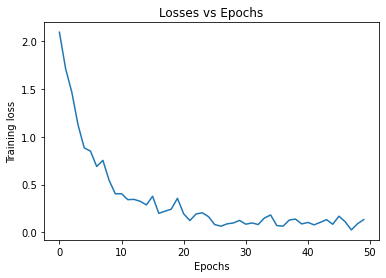

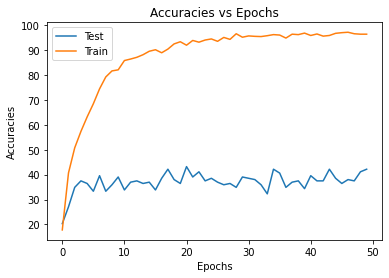

In [ ]:

class Classification_Net(nn.Module):
    def __init__(self, input_dims=8192):
        super(Classification_Net, self).__init__()
        self.fc1 = nn.Linear(input_dims, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 8)
        self.dropout_2 = nn.Dropout(p=0.2)
        self.dropout_5 = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()

    def forward(self, feats):
        concat_vector = feats
        out1 = self.dropout_5(self.relu(self.fc1(concat_vector)))
        out2 = self.dropout_2(self.relu(self.fc2(out1)))
        out3 = self.dropout_2(self.relu(self.fc3(out2)))
        out4 = self.fc4(out3)
        return out4



train_tensor_x = torch.Tensor(img_train_x)
train_tensor_y = torch.Tensor(img_train_y)
test_tensor_x = torch.Tensor(img_test_x)
test_tensor_y = torch.Tensor(img_test_y)

print(train_tensor_x.shape, train_tensor_y.shape, test_tensor_x.shape, test_tensor_y.shape)

train_dataset = TensorDataset(train_tensor_x, train_tensor_y)
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)

test_dataset = TensorDataset(test_tensor_x, test_tensor_y)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True, drop_last=True)

model = Classification_Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max')

losses = []
val_accs = []
train_accs = []

for epoch in range(50):
      for itr, (x, y) in enumerate(train_dataloader):

        outputs = model(x)
        loss = criterion(outputs, y.long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 

        if(itr%100 == 0):
          with torch.no_grad():
            train_correct = 0
            train_total = 0
            val_correct = 0
            val_total = 0

            train_preds = []
            train_gts = []
            test_preds = []
            test_gts = []            

            for x, y in test_dataloader:
              # x = x.cuda()
              # y = y.cuda()

              outputs = model(x)

              _, predicted = torch.max(outputs.data, 1)
              val_total += y.size(0)
              val_correct += (predicted == y.long()).sum().item()

              test_gts += list(y.cpu().detach().numpy())
              test_preds += list(predicted.cpu().detach().numpy())              

            for i, (x, y) in enumerate(train_dataloader):
              if(i == 50):
                break

              outputs = model(x)

              _, predicted = torch.max(outputs.data, 1)
              train_total += y.size(0)
              train_correct += (predicted == y.long()).sum().item()

              train_gts += list(y.cpu().detach().numpy())
              train_preds += list(predicted.cpu().detach().numpy())

            train_precision = precision_score(train_gts, train_preds, average='macro')
            train_recall = recall_score(train_gts, train_preds, average='macro')
            test_precision = precision_score(test_gts, test_preds, average='macro')
            test_recall = recall_score(test_gts, test_preds, average='macro')
            test_f1 = recall_score(test_gts, test_preds, average='macro')
            test_conf= confusion_matrix(test_gts, test_preds)

            print('Epoch: '+str(epoch)+', Itr: '+str(itr)+', Loss: '+str(loss.item())+', Val acc: '+str(100 * val_correct/val_total)+', Train acc: '+str(100 * train_correct/train_total))
            print('TrainP: '+str(train_precision)+', TrainR: '+str(train_recall)+', TestP: '+str(test_precision)+', TestR: '+str(test_recall)+', TestF1: '+str(test_f1))              
            losses.append(loss.item())
            val_accs.append(100 * val_correct/val_total)
            train_accs.append(100 * train_correct/train_total)
print(test_conf)
torch.save(model.state_dict(), '/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/model_concat_16384_dimensional.ckpt')

plt.figure()
plt.plot(losses)
plt.title('Losses vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.savefig('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/unimodal_img_loss.png')

plt.figure()
plt.plot(val_accs, label='Test')
plt.plot(train_accs, label='Train')
plt.title('Accuracies vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/unimodal_img_acc.png')







### Audio Multilayer Perceptron Model

Epoch: 0, Itr: 0, Loss: 2.075849771499634, Val acc: 15.625, Train acc: 14.496527777777779
TrainP: 0.1193809739393861, TrainR: 0.14310865589621255, TestP: 0.14608704137392664, TestR: 0.14818432473323778, TestF1: 0.14818432473323778
Epoch: 1, Itr: 0, Loss: 2.0143864154815674, Val acc: 15.104166666666666, Train acc: 21.52777777777778
TrainP: 0.3255601117131831, TrainR: 0.20154605315982305, TestP: 0.11042704872646733, TestR: 0.1419483153722284, TestF1: 0.1419483153722284
Epoch: 2, Itr: 0, Loss: 1.9817936420440674, Val acc: 15.625, Train acc: 28.645833333333332
TrainP: 0.2525611991295979, TrainR: 0.2696705629325627, TestP: 0.12621500484164958, TestR: 0.14713833559410772, TestF1: 0.14713833559410772
Epoch: 3, Itr: 0, Loss: 1.8203701972961426, Val acc: 11.979166666666666, Train acc: 34.28819444444444
TrainP: 0.3308438646583765, TrainR: 0.3220319933371479, TestP: 0.10234938820045202, TestR: 0.1153091448781104, TestF1: 0.1153091448781104
Epoch: 4, Itr: 0, Loss: 1.609199047088623, Val acc: 16.66

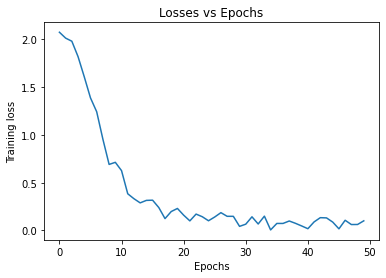

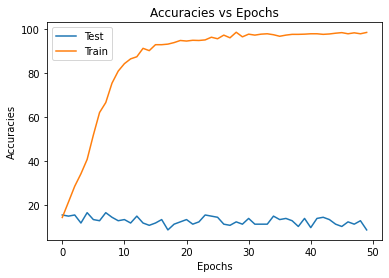

In [ ]:
class Classification_Net(nn.Module):
    def __init__(self, input_dims=3887):
        super(Classification_Net, self).__init__()
        self.fc1 = nn.Linear(input_dims, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 8)
        self.dropout_2 = nn.Dropout(p=0.2)
        self.dropout_5 = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()

    def forward(self, feats):
        concat_vector = feats
        out1 = self.dropout_5(self.relu(self.fc1(concat_vector)))
        out2 = self.dropout_2(self.relu(self.fc2(out1)))
        out3 = self.dropout_2(self.relu(self.fc3(out2)))
        out4 = self.fc4(out3)
        return out4


train_tensor_x = torch.Tensor(audio_train_x)
train_tensor_y = torch.Tensor(labs)
test_tensor_x = torch.Tensor(audio_test_x)
test_tensor_y = torch.Tensor(test_labs)

train_dataset = TensorDataset(train_tensor_x, train_tensor_y)
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)

test_dataset = TensorDataset(test_tensor_x, test_tensor_y)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True, drop_last=True)

model = Classification_Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max')


losses = []
val_accs = []
train_accs = []

for epoch in range(50):
      for itr, (x, y) in enumerate(train_dataloader):
        outputs = model(x)
        loss = criterion(outputs, y.long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 

        if(itr%100 == 0):
          with torch.no_grad():
            train_correct = 0
            train_total = 0
            val_correct = 0
            val_total = 0

            train_preds = []
            train_gts = []
            test_preds = []
            test_gts = []

            for x, y in test_dataloader:
              outputs = model(x)
              _, predicted = torch.max(outputs.data, 1)
              val_total += y.size(0)
              val_correct += (predicted == y.long()).sum().item()

              test_preds += list(predicted.cpu().detach().numpy())
              test_gts += list(y.cpu().detach().numpy())

            for i, (x, y) in enumerate(train_dataloader):
              if(i == 50):
                break
              outputs = model(x)

              _, predicted = torch.max(outputs.data, 1)
              train_total += y.size(0)
              train_correct += (predicted == y.long()).sum().item()

              train_preds += list(predicted.cpu().detach().numpy())
              train_gts += list(y.cpu().detach().numpy())              
              
            train_precision = precision_score(train_gts, train_preds, average='macro')
            train_recall = recall_score(train_gts, train_preds, average='macro')
            test_precision = precision_score(test_gts, test_preds, average='macro')
            test_recall = recall_score(test_gts, test_preds, average='macro')
            test_f1 = recall_score(test_gts, test_preds, average='macro')
            test_conf= confusion_matrix(test_gts, test_preds)

            print('Epoch: '+str(epoch)+', Itr: '+str(itr)+', Loss: '+str(loss.item())+', Val acc: '+str(100 * val_correct/val_total)+', Train acc: '+str(100 * train_correct/train_total))
            print('TrainP: '+str(train_precision)+', TrainR: '+str(train_recall)+', TestP: '+str(test_precision)+', TestR: '+str(test_recall)+', TestF1: '+str(test_f1))              
            losses.append(loss.item())
            val_accs.append(100 * val_correct/val_total)
            train_accs.append(100 * train_correct/train_total)
print(test_conf)
            # scheduler.step(100 * val_correct/val_total)

plt.figure()
plt.plot(losses)
plt.title('Losses vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.savefig('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/unimodal_audio_loss.png')

plt.figure()
plt.plot(val_accs, label='Test')
plt.plot(train_accs, label='Train')
plt.title('Accuracies vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/unimodal_audio_acc.png')

### Early Fusion Model

Epoch: 0, Itr: 0, Loss: 4.174067974090576, Val img acc: 15.972222222222221, Train img acc: 16.493055555555557, Val audio acc: 18.40277777777778, Train audio acc: 17.100694444444443
ImgTrainP: 0.3002730893166297, ImgTrainR: 0.15584713120914617, ImgTestP: 0.27154770150955887, ImgTestR: 0.15024118536360376, ImgTestF1: 0.10146330024954889
AudioTrainP: 0.19342243545737675, AudioTrainR: 0.16592519092296187, AudioTestP: 0.18289498881545868, AudioTestR: 0.17664372256102767, AudioTestF1: 0.15782548068102709
Epoch: 1, Itr: 0, Loss: 3.391056537628174, Val img acc: 35.24305555555556, Train img acc: 37.58680555555556, Val audio acc: 34.201388888888886, Train audio acc: 34.80902777777778
ImgTrainP: 0.3822664498032323, ImgTrainR: 0.3632440704700203, ImgTestP: 0.3622236946896134, ImgTestR: 0.3393805838842481, ImgTestF1: 0.3329344319780054
AudioTrainP: 0.34109480392826685, AudioTrainR: 0.3340330029126213, AudioTestP: 0.34930497482287226, AudioTestR: 0.3308771716291703, AudioTestF1: 0.32684476353036496


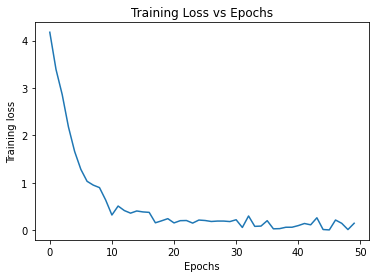

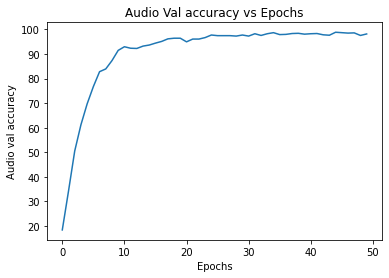

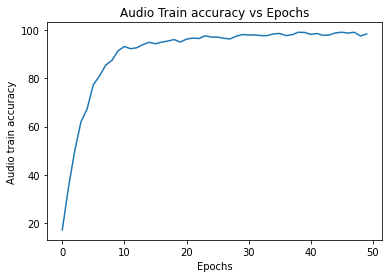

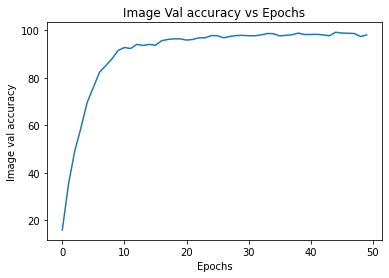

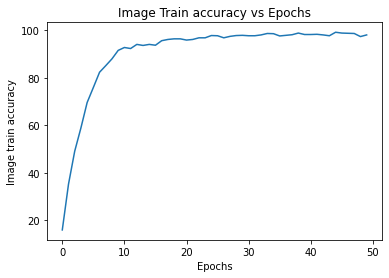

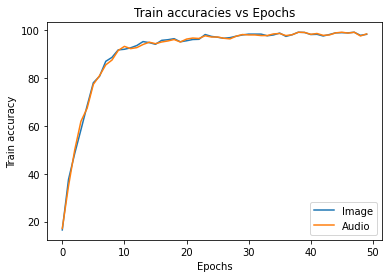

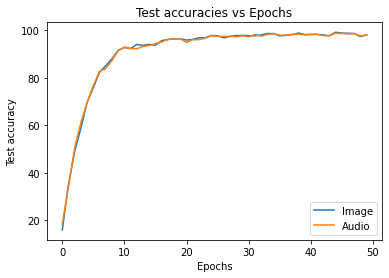

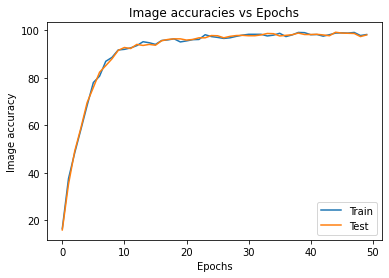

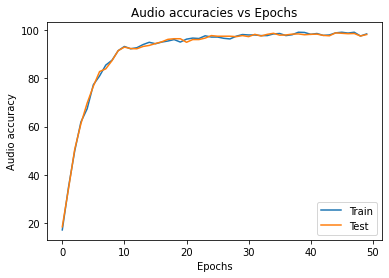

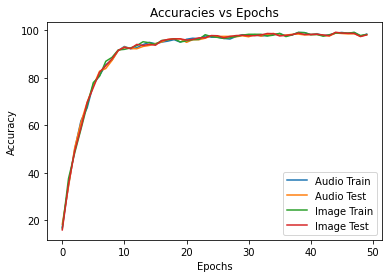

In [ ]:
class TextAndImageDataset(Dataset):
	def __init__(self, data, labels):
		self.img_data = data[0]
		self.text_data = data[1]
		self.img_labels = labels[0]
		self.text_labels = labels[1]

	def __len__(self):
		return len(self.img_data)

	def __getitem__(self, idx):
		if torch.is_tensor(idx):
			idx = idx.tolist()
			
		img = self.img_data[idx]
		img_l = self.img_labels[idx]
		text = self.text_data[idx]
		text_l = self.text_labels[idx]

		return ([img, text], [img_l, text_l])

class Concat_Net(nn.Module):
    def __init__(self, img_input_dims=8192, audio_input_dims=3887):
        super(Concat_Net, self).__init__()
        self.fc1 = nn.Linear(audio_input_dims+img_input_dims, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4_audio = nn.Linear(64, 8)
        self.fc4_img = nn.Linear(64, 8)
        self.dropout_2 = nn.Dropout(p=0.2)
        self.dropout_5 = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()

    def forward(self, img_feats, audio_feats):
        concat_vector = torch.cat((img_feats, audio_feats), dim=1)
        out1 = self.dropout_5(self.relu(self.fc1(concat_vector.float())))
        out2 = self.dropout_2(self.relu(self.fc2(out1)))
        out3 = self.dropout_2(self.relu(self.fc3(out2)))
        out_img = self.fc4_img(out3)
        out_audio = self.fc4_audio(out3)
        return out_img, out_audio

train_data = [img_train_x, audio_train_x]
train_labels = [img_train_y, img_train_y]
test_data = [img_test_x, audio_test_x]
test_labels = [img_test_y, audio_test_y]

train_dataset = TextAndImageDataset(train_data, train_labels)
test_dataset = TextAndImageDataset(test_data, test_labels)

train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)
test_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=False, drop_last=True)

model = Concat_Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max')
# model.cuda()

losses = []
img_train_acc = []
img_test_acc = []
audio_train_acc = []
audio_test_acc = []

for epoch in range(50):
      for itr, (x, y) in enumerate(train_dataloader):
        outputs_img, outputs_audio = model(x[0], x[1])
        loss = criterion(outputs_audio, y[1].long()) + criterion(outputs_img, y[0].long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 

        if(itr%100 == 0):
          with torch.no_grad():
            train_correct_img = 0
            train_total_img = 0
            val_correct_img = 0
            val_total_img = 0
            train_correct_audio = 0
            train_total_audio = 0
            val_correct_audio = 0
            val_total_audio = 0

            img_train_preds = []
            img_train_gts = []
            img_test_preds = []
            img_test_gts = []            
            audio_train_preds = []
            audio_train_gts = []
            audio_test_preds = []
            audio_test_gts = []                        
            
            for x, y in test_dataloader:
              outputs_img, outputs_audio = model(x[0], x[1])

              _, predicted_img = torch.max(outputs_img.data, 1)
              val_total_img += y[0].size(0)
              val_correct_img += (predicted_img == y[0].long()).sum().item()

              _, predicted_audio = torch.max(outputs_audio.data, 1)
              val_total_audio += y[1].size(0)
              val_correct_audio += (predicted_audio == y[1].long()).sum().item()

              img_test_gts += list(y[0].cpu().detach().numpy())
              img_test_preds += list(predicted_img.cpu().detach().numpy())              
              audio_test_gts += list(y[1].cpu().detach().numpy())
              audio_test_preds += list(predicted_audio.cpu().detach().numpy())

            for i, (x, y) in enumerate(train_dataloader):
              if(i == 50):
                break

              outputs_img, outputs_audio = model(x[0], x[1])

              _, predicted_img = torch.max(outputs_img.data, 1)
              train_total_img += y[0].size(0)
              train_correct_img += (predicted_img == y[0].long()).sum().item()

              _, predicted_audio = torch.max(outputs_audio.data, 1)
              train_total_audio += y[1].size(0)
              train_correct_audio += (predicted_audio == y[1].long()).sum().item()

              img_train_gts += list(y[0].cpu().detach().numpy())
              img_train_preds += list(predicted_img.cpu().detach().numpy())              
              audio_train_gts += list(y[1].cpu().detach().numpy())
              audio_train_preds += list(predicted_audio.cpu().detach().numpy())

            img_train_precision = precision_score(img_train_gts, img_train_preds, average='macro')
            img_train_recall = recall_score(img_train_gts, img_train_preds, average='macro')
            img_test_precision = precision_score(img_test_gts, img_test_preds, average='macro')
            img_test_recall = recall_score(img_test_gts, img_test_preds, average='macro')
            img_test_f1 = f1_score(img_test_gts, img_test_preds, average='macro')
            img_test_conf=confusion_matrix(img_test_gts, img_test_preds)

            audio_train_precision = precision_score(audio_train_gts, audio_train_preds, average='macro')
            audio_train_recall = recall_score(audio_train_gts, audio_train_preds, average='macro')
            audio_test_precision = precision_score(audio_test_gts, audio_test_preds, average='macro')
            audio_test_recall = recall_score(audio_test_gts, audio_test_preds, average='macro')
            audio_test_f1 = f1_score(audio_test_gts, audio_test_preds, average='macro')
            audio_test_conf = confusion_matrix(audio_test_gts, audio_test_preds)

            print('Epoch: '+str(epoch)+', Itr: '+str(itr)+', Loss: '+str(loss.item())+', Val img acc: '+str(100 * val_correct_img/val_total_img)+', Train img acc: '+str(100 * train_correct_img/train_total_img)+', Val audio acc: '+str(100 * val_correct_audio/val_total_audio)+', Train audio acc: '+str(100 * train_correct_audio/train_total_audio))
            print('ImgTrainP: '+str(img_train_precision)+', ImgTrainR: '+str(img_train_recall)+', ImgTestP: '+str(img_test_precision)+', ImgTestR: '+str(img_test_recall)+', ImgTestF1: '+str(img_test_f1))              
            print('AudioTrainP: '+str(audio_train_precision)+', AudioTrainR: '+str(audio_train_recall)+', AudioTestP: '+str(audio_test_precision)+', AudioTestR: '+str(audio_test_recall)+', AudioTestF1: '+str(audio_test_f1))               
            losses.append(loss.item())
            audio_test_acc.append(100*val_correct_audio/val_total_audio)
            audio_train_acc.append(100*train_correct_audio/train_total_audio)
            img_test_acc.append(100*val_correct_img/val_total_img)
            img_train_acc.append(100*train_correct_img/train_total_img)   


print(img_test_conf)
print(audio_test_conf)
torch.save(model.state_dict(), 'model_concat_18420_dimensional.ckpt')

plt.figure()
plt.plot(losses)
plt.title('Training Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.savefig('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/ef_losses.png')

plt.figure()
plt.plot(audio_test_acc)
plt.title('Audio Val accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Audio val accuracy')
plt.savefig('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/ef_audio_test_acc.png')

plt.figure()
plt.plot(audio_train_acc)
plt.title('Audio Train accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Audio train accuracy')
plt.savefig('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/ef_audio_train_acc.png')

plt.figure()
plt.plot(img_test_acc)
plt.title('Image Val accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Image val accuracy')
plt.savefig('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/ef_image_test_acc.png')

plt.figure()
plt.plot(img_test_acc)
plt.title('Image Train accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Image train accuracy')
plt.savefig('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/ef_image_train_acc.png')

plt.figure()
plt.plot(img_train_acc, label='Image')
plt.plot(audio_train_acc, label='Audio')
plt.title('Train accuracies vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Train accuracy')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/ef_train_acc.png')

plt.figure()
plt.plot(img_test_acc, label='Image')
plt.plot(audio_test_acc, label='Audio')
plt.title('Test accuracies vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Test accuracy')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/ef_test_acc.png')

plt.figure()
plt.plot(img_train_acc, label='Train')
plt.plot(img_test_acc, label='Test')
plt.title('Image accuracies vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Image accuracy')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/ef_image_acc.png')

plt.figure()
plt.plot(audio_train_acc, label='Train')
plt.plot(audio_test_acc, label='Test')
plt.title('Audio accuracies vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Audio accuracy')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/ef_audio_acc.png')

plt.figure()
plt.plot(audio_train_acc, label='Audio Train')
plt.plot(audio_test_acc, label='Audio Test')
plt.plot(img_train_acc, label='Image Train')
plt.plot(img_test_acc, label='Image Test')
plt.title('Accuracies vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/Academic/Sem8/AFC/Assignment_3/ef_all_acc.png')


In [ ]:
model

Concat_Net(
  (fc1): Linear(in_features=12079, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4_audio): Linear(in_features=64, out_features=8, bias=True)
  (fc4_img): Linear(in_features=64, out_features=8, bias=True)
  (dropout_2): Dropout(p=0.2, inplace=False)
  (dropout_5): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
)